# TECH CHALLENGE POS TECH FIAP FASE 1

Quais são os fatores que influenciam as exportações de vinhos brasileiros e como a análise de dados pode orientar decisões estratégicas para aumentar sua competitividade no mercado internacional?

> **Membros:** Aline Korb, Carol Defavori, Gabriel Teles, Manzini e Thiago Temporim

Essa análise tem como objetivo responder a pergunta principal, utilizando tecnologias como Python para realizar o tratamento das bases de dados e a visualização desses por meio de gráficos intuitivos que buscarão extrair insights importantes para a decisão final dos investidores.



* 1º Passo - Importação das bibliotecas que serão utilizadas ao longo do notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
from unidecode import unidecode

* 2º Passo - Leitura das bases de dados

In [2]:
comercializacao = pd.read_csv("data\Comercializacao.csv", encoding="utf-8", sep=";", engine="python")
exp_espumante = pd.read_csv("data\Exportacao - Espumante.csv", encoding="utf-8", sep="\t", engine="python")
imp_espumante = pd.read_csv("data\Importacao - Espumantes.csv", encoding="utf-8", sep="\t", engine="python")
exp_suco_uva = pd.read_csv("data\Exportacao - Suco de Uva.csv", encoding="utf-8", sep="\t", engine="python")
imp_suco_uva = pd.read_csv("data\Importacao - Suco de Uva.csv", encoding="utf-8", sep=";", engine="python")
exp_uvas_frescas = pd.read_csv("data\Exportacao - Uvas Frescas.csv", encoding="utf-8", sep="\t", engine="python")
imp_uvas_frescas = pd.read_csv("data\Importacao - Frescas.csv", encoding="utf-8", sep="\t", engine="python")
exp_vinho_mesa = pd.read_csv("data\Exportacao - Vinho de Mesa.csv", encoding="utf-8", sep="\t", quotechar='"', engine="python")
imp_vinho_mesa = pd.read_csv("data\Importacao - Vinhos de Mesa.csv", encoding="utf-8", sep="\t", engine="python")
imp_uva_passas = pd.read_csv("data\Importacao - Passas.csv", encoding="utf-8", sep="\t", engine="python")
viniferas = pd.read_csv("data\Processamento - Viniferas.csv", encoding="ISO-8859-1", sep=";", engine="python")
americanas_hibridas = pd.read_csv("data\Processamento - Americanas e Hibridas.csv", encoding="utf-8", sep="\t", engine="python")
sem_classificacao = pd.read_csv("data\Processamento - Sem Classificacao.csv", encoding="utf-8", sep="\t", engine="python")
uvas_de_mesa = pd.read_csv("data\Processamento - Uvas de Mesa.csv", encoding="utf-8", sep="\t", engine="python")
producao = pd.read_csv("data\Producao.csv", encoding="utf-8", sep=";", engine="python")

In [3]:
def trim_df(df):
    """
    Remove espaços dos nomes das colunas e dos valores string de cada célula.
    """
    df = df.copy()
    
    # Trim nos nomes das colunas
    df.columns = df.columns.str.strip()
    
    # Trim nos valores string das células
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)
    
    return df

* 3º Passo - Realizar as análises

# Analisando a produção

In [4]:
producao.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [5]:
producao_vinhos = producao[producao['control'].str.contains('vinho|vm', case=False, na=False)]

In [6]:
producao.tail()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
46,47,de_Espumante orgânico,Espumante orgânico,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2412,0,1365
47,48,de_Destilado alcoólico simples de bagaceira,Destilado alcoólico simples de bagaceira,0,0,0,0,0,0,0,...,0,0,0,0,0,0,500,3000,4300,0
48,49,de_Vinho acidificado,Vinho acidificado,0,0,0,0,0,0,0,...,0,0,0,0,0,0,65000,0,0,2500
49,50,de_Mosto parcialmente fermentado,Mosto parcialmente fermentado,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,543510,0,0
50,51,de_Outros derivados,Outros derivados,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,322,247228,652301


In [7]:
#remove a coluna control
producao_sem_id = producao.drop("control", axis=1)
producao_vinhos = producao_vinhos.drop("control", axis=1)

In [8]:
producao_sem_id.T.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
id,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
produto,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0


In [9]:
# renomeia a coluna de produto para ano
producao_sem_id = producao_sem_id.rename(columns={"produto": "ano"})
producao_vinhos = producao_vinhos.rename(columns={"produto": "ano"})

In [10]:
# invert df
producao_sem_id = producao_sem_id.T
producao_vinhos = producao_vinhos.T

In [11]:
producao_sem_id.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
id,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
ano,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0


In [12]:
# Transforma o índice em coluna
producao_sem_id = producao_sem_id.reset_index()
# Usa a linha com 'ano' como cabeçalho
producao_sem_id.columns = producao_sem_id.iloc[1]  # A linha 'ano' está no índice 1 após reset
# Remove as duas primeiras linhas (antigo index 'id' e 'ano')
producao_sem_id = producao_sem_id[2:].reset_index(drop=True)

producao_vinhos = producao_vinhos.reset_index()
# Usa a linha com 'ano' como cabeçalho
producao_vinhos.columns = producao_vinhos.iloc[1]  # A linha 'ano' está no índice 1 após reset
# Remove as duas primeiras linhas (antigo index 'id' e 'ano')
producao_vinhos = producao_vinhos[2:].reset_index(drop=True)


In [13]:
producao_sem_id.head()

1,ano,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
0,1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1,1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,...,3565644,0,0,0,0,0,0,0,0,0
2,1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,...,3015037,0,0,0,0,0,0,0,0,0
3,1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,...,3559922,0,0,0,0,0,0,0,0,0
4,1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,...,5136979,0,0,0,0,0,0,0,0,0


In [14]:
print(producao_sem_id['ano'].dtype)

object


In [15]:
# troca o tipo da coluna para inteiro
producao_sem_id['ano'] = producao_sem_id['ano'].astype(int)
producao_vinhos['ano'] = producao_vinhos['ano'].astype(int)

In [16]:
print(producao_sem_id['ano'].dtype)

int32


In [17]:
# define a coluna ano como index
producao_sem_id = producao_sem_id.set_index("ano")
producao_vinhos = producao_vinhos.set_index("ano")

In [18]:
producao_sem_id.head()

1,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
ano,,,,,,,,,,,,,,,,,,,,,
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,3559922,0,0,0,0,0,0,0,0,0
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,5136979,0,0,0,0,0,0,0,0,0


In [19]:
# Cria uma nova coluna de total
producao_sem_id['Total Por Ano'] = producao_sem_id.sum(axis=1)
producao_vinhos['Total Por Ano'] = producao_vinhos.sum(axis=1)

In [20]:
producao_vinhos

1,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Vinho leve,Vinho licoroso,Vinho Composto,Vinho orgânico,Vinho acidificado,Total Por Ano
ano,,,,,,,,,,,
1970,217208604,174224052,748400,42236152,23899346,0,0,0,0,0,458316554
1971,154264651,121133369,1160500,31970782,23586062,0,0,0,0,0,332115364
1972,146953297,118180926,1812367,26960004,21078771,0,0,0,0,0,314985365
1973,116710345,88589019,243900,27877426,12368410,0,0,0,0,0,245789100
1974,193875345,146544484,4138768,43192093,31644124,0,0,0,0,0,419394814
1975,177401209,144274134,1441507,31685568,39424590,0,0,0,0,0,394227008
1976,144565438,118360170,1871473,24333795,34500590,0,0,0,0,0,323631466
1977,195359778,154801826,4954387,35603565,41264971,0,0,0,0,0,431984527
1978,200053669,162917363,5079748,32056558,36750933,0,0,0,0,0,436858271


In [21]:
producao_sem_id.head()

1,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,0,0,0,0,0,0,0,0,0,512740100
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,0,0,0,0,0,0,0,0,0,386855770
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,0,0,0,0,0,0,0,0,0,367712034
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,0,0,0,0,0,0,0,0,0,314793348
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,0,0,0,0,0,0,0,0,0,546848806


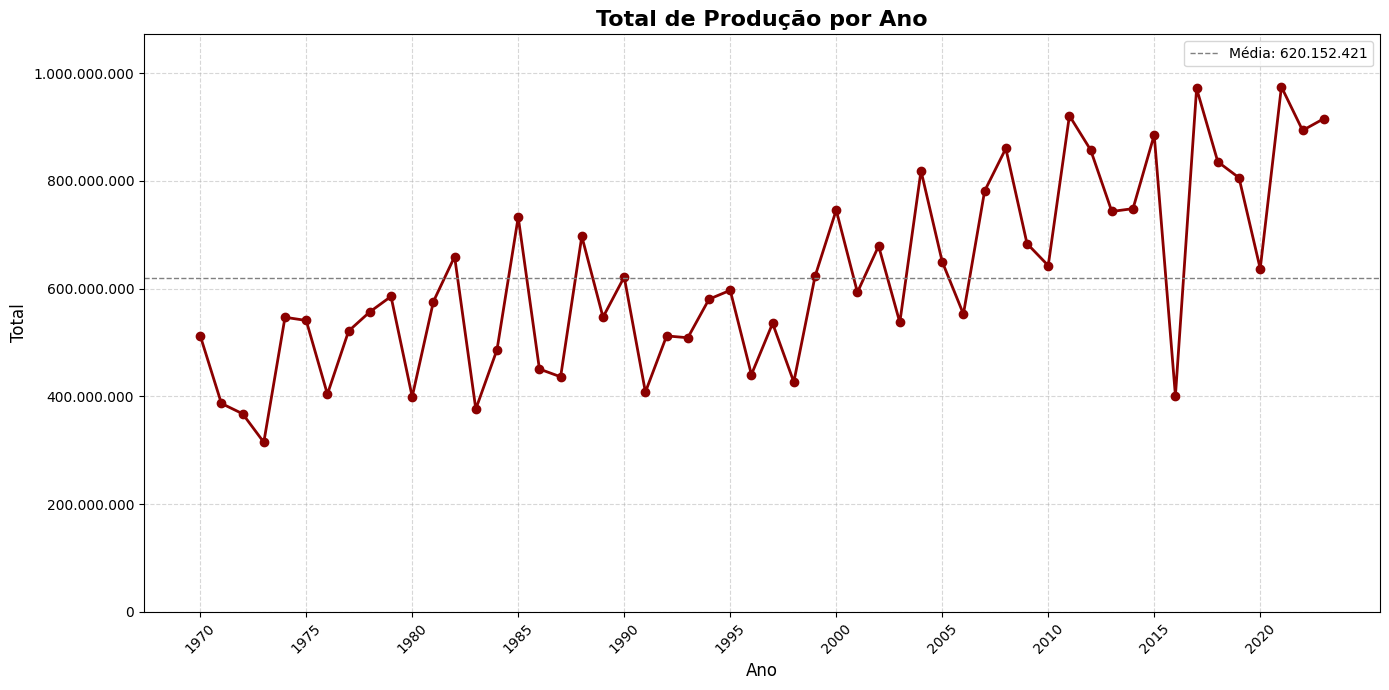

In [22]:
# Plot do gráfico
plt.figure(figsize=(14, 7))
plt.plot(producao_sem_id.index, producao_sem_id['Total Por Ano'], marker='o', linestyle='-', color='darkred', linewidth=2)

plt.title('Total de Produção por Ano', fontsize=16, weight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Mostrar apenas anos de 5 em 5 no eixo X
plt.xticks(ticks=range(min(producao_sem_id.index), max(producao_sem_id.index)+1, 5), rotation=45, fontsize=10)

# Formatador de milhar no eixo Y
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Ajusta o limite do eixo Y para começar em 0 e terminar no valor máximo da coluna
plt.ylim(0, producao_sem_id['Total Por Ano'].max() * 1.1)  # Multiplica por 1.1 para dar um pequeno espaço acima do valor máximo

# Adiciona uma linha para destacar a média geral
media_total = producao_sem_id['Total Por Ano'].mean()
plt.axhline(media_total, color='gray', linestyle='--', linewidth=1, label=f'Média: {media_total:,.0f}'.replace(',', '.'))
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

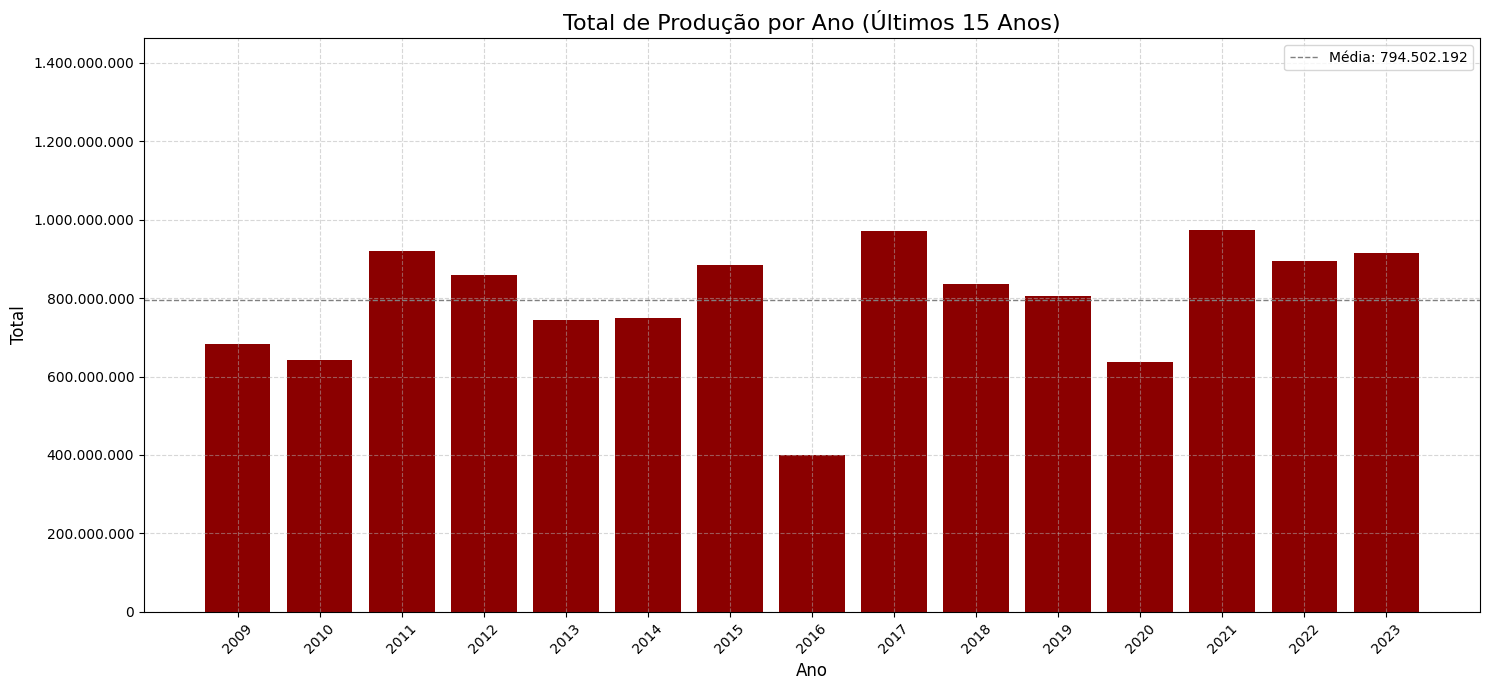

In [23]:
# Filtra os últimos 15 anos
ultimos_15_anos = producao_sem_id.tail(15)

# Plot do gráfico
plt.figure(figsize=(15, 7))
plt.bar(ultimos_15_anos.index, ultimos_15_anos['Total Por Ano'], linestyle='-', color='darkred', linewidth=2)

plt.title('Total de Produção por Ano (Últimos 15 Anos)', fontsize=16, weight='light')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Garantir que o eixo X mostre todos os anos
plt.xticks(ultimos_15_anos.index, rotation=45, fontsize=10)

# Formatador de milhar no eixo Y
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Ajusta o limite do eixo Y para começar em 0 e terminar no valor máximo da coluna
plt.ylim(0, ultimos_15_anos['Total Por Ano'].max() * 1.5)  # Multiplica por 1.5 para dar um espaço maior acima do valor máximo

# Adiciona uma linha para destacar a média geral
media_total = ultimos_15_anos['Total Por Ano'].mean()
plt.axhline(media_total, color='gray', linestyle='--', linewidth=1, label=f'Média: {media_total:,.0f}'.replace(',', '.'))
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_ultimos_15_anos(df, column_name='Total Por Ano', title='Total de Produção por Ano (Últimos 15 Anos)', color='darkred', figsize=(15, 7)):
    """
    Plota o gráfico de barras dos últimos 15 anos de produção.

    Parâmetros:
    df (DataFrame): O DataFrame contendo os dados.
    column_name (str): O nome da coluna a ser usada para os valores de produção (default é 'Total Por Ano').
    title (str): O título do gráfico (default é 'Total de Produção por Ano (Últimos 15 Anos)').
    color (str): Cor das barras do gráfico (default é 'darkred').
    figsize (tuple): Tamanho da figura do gráfico (default é (15, 7)).
    """
    # Verificar se o 'column_name' existe nas colunas do DataFrame
    if column_name not in df.columns:
        raise ValueError(f"A coluna '{column_name}' não foi encontrada no DataFrame.")

    # Filtra os últimos 15 anos
    ultimos_15_anos = df.tail(15)

    # Plot do gráfico
    plt.figure(figsize=figsize)
    plt.bar(ultimos_15_anos.index, ultimos_15_anos[column_name], linestyle='-', color=color, linewidth=2)

    plt.title(title, fontsize=16, weight='light')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Total', fontsize=12)

    # Garantir que o eixo X mostre todos os anos
    plt.xticks(ultimos_15_anos.index, rotation=45, fontsize=10)

    # Formatador de milhar no eixo Y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Ajusta o limite do eixo Y para começar em 0 e terminar no valor máximo da coluna
    plt.ylim(0, ultimos_15_anos[column_name].max() * 1.5)  # Multiplica por 1.5 para dar um espaço maior acima do valor máximo

    # Adiciona uma linha para destacar a média geral
    media_total = ultimos_15_anos[column_name].mean()
    plt.axhline(media_total, color='gray', linestyle='--', linewidth=1, label=f'Média: {media_total:,.0f}'.replace(',', '.'))
    plt.legend()

    # Adiciona os valores em cima de cada barra
    for i, valor in enumerate(ultimos_15_anos[column_name]):
        plt.text(ultimos_15_anos.index[i], valor + (ultimos_15_anos[column_name].max() * 0.02),  # Pequeno deslocamento
             f'{int(valor):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=7, fontweight='bold')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [25]:
producao_vinhos

1,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Vinho leve,Vinho licoroso,Vinho Composto,Vinho orgânico,Vinho acidificado,Total Por Ano
ano,,,,,,,,,,,
1970,217208604,174224052,748400,42236152,23899346,0,0,0,0,0,458316554
1971,154264651,121133369,1160500,31970782,23586062,0,0,0,0,0,332115364
1972,146953297,118180926,1812367,26960004,21078771,0,0,0,0,0,314985365
1973,116710345,88589019,243900,27877426,12368410,0,0,0,0,0,245789100
1974,193875345,146544484,4138768,43192093,31644124,0,0,0,0,0,419394814
1975,177401209,144274134,1441507,31685568,39424590,0,0,0,0,0,394227008
1976,144565438,118360170,1871473,24333795,34500590,0,0,0,0,0,323631466
1977,195359778,154801826,4954387,35603565,41264971,0,0,0,0,0,431984527
1978,200053669,162917363,5079748,32056558,36750933,0,0,0,0,0,436858271


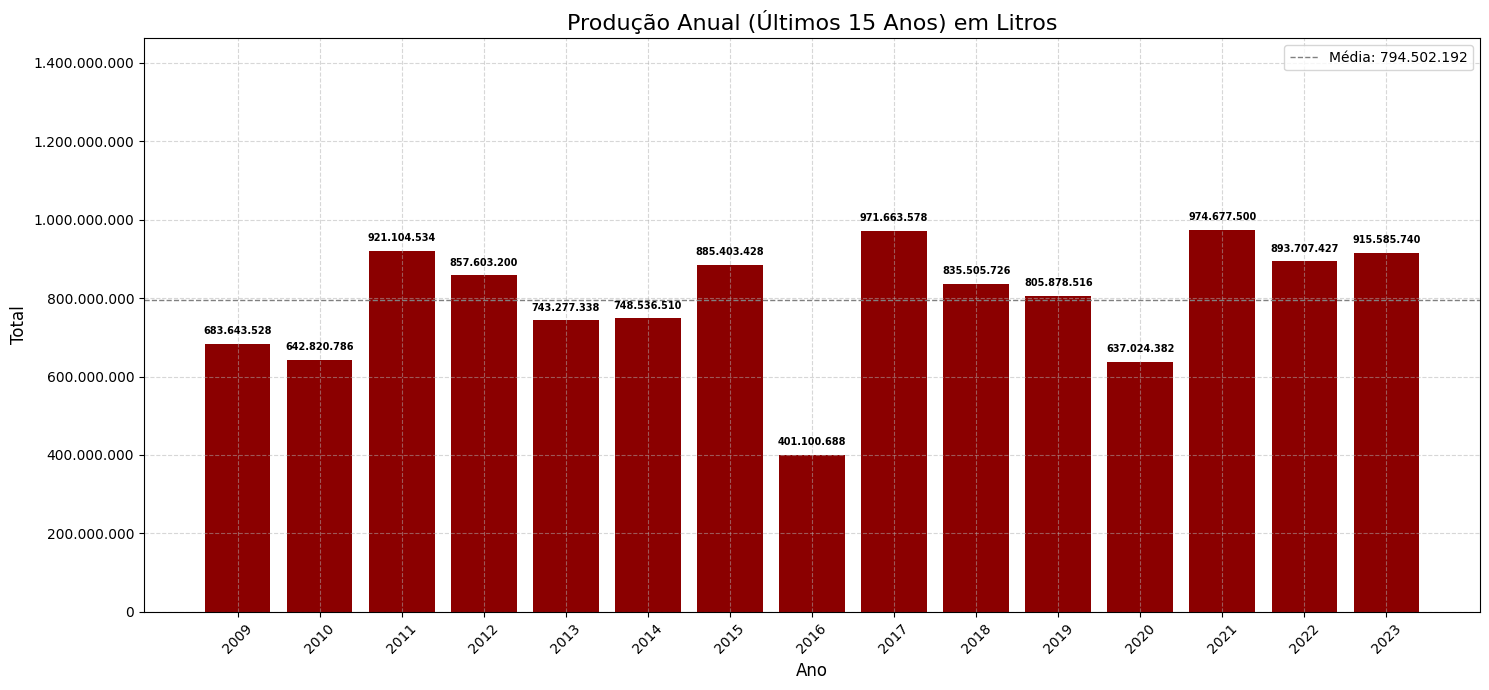

In [26]:
plot_ultimos_15_anos(producao_sem_id, column_name='Total Por Ano', title='Produção Anual (Últimos 15 Anos) em Litros', color='darkred')

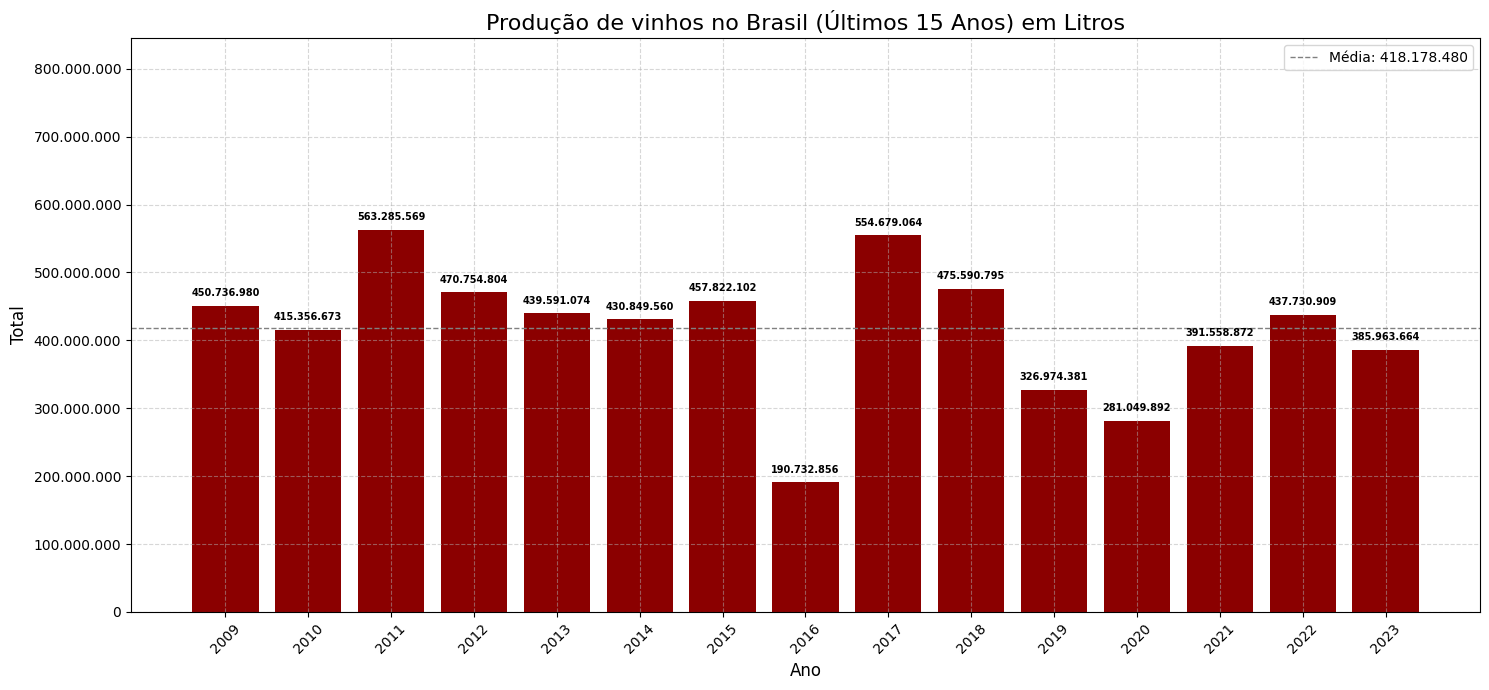

In [27]:
plot_ultimos_15_anos(producao_vinhos, column_name='Total Por Ano', title='Produção de vinhos no Brasil (Últimos 15 Anos) em Litros', color='darkred')

# Analisando a exportação total de produtos relacionados a vinho

In [28]:
exp_vinho_mesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
exp_espumante.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,44,78,1353
1,2,Alemanha,0,0,0,0,0,0,0,0,...,2388,14767,142,265,1164,6560,162,1542,22542,77981
2,3,Angola,0,0,0,0,0,0,0,0,...,24,38,0,0,26383,141588,56242,315073,0,0
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,32,328,10,82,65,146,24,100,23,100
4,5,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
exp_suco_uva.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,34344,49753,0,0,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,86,44,13,4,5,24,33,39,6,17
2,3,Angola,0,0,0,0,0,0,0,0,...,17766,21627,6073,5915,86536,91839,55683,68724,4974,9112
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,36,25,120,168,48,57,0,0,0,0
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


In [31]:
exp_uvas_frescas.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,44,152,0,0,0,0,30,136,0,0
1,2,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,...,1371694,2791556,1461590,2569452,559012,1213303,1701887,4101648,807805,2269851
2,3,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,304,1013,437,1349,253,999,260,1173,521,2562
4,5,Arabia Saudita,0,0,0,0,0,0,0,0,...,32325,95999,2818,14671,12224,53675,2234,19382,810,2823


In [32]:
exp_espumante.shape

(107, 112)

In [33]:
exp_suco_uva.shape

(125, 112)

In [34]:
exp_uvas_frescas.shape

(140, 112)

In [35]:
exp_vinho_mesa.shape

(141, 112)

In [36]:
# concatena os DFs
exportacao = pd.concat([exp_suco_uva, exp_uvas_frescas, exp_espumante, exp_vinho_mesa], ignore_index=True)

In [37]:
exportacao.shape

(513, 112)

In [38]:
exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,34344,49753,0,0,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,86,44,13,4,5,24,33,39,6,17
2,3,Angola,0,0,0,0,0,0,0,0,...,17766,21627,6073,5915,86536,91839,55683,68724,4974,9112
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,36,25,120,168,48,57,0,0,0,0
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Renomear colunas com sufixo '.1' para 'Valor USD'
for year in range(1970, 2025):
    col_usd = f"{year}.1"
    
    if col_usd in exportacao.columns:
        exportacao = exportacao.rename(columns={col_usd: f"{year} Valor USD"})


In [40]:
exportacao.head()

,Id,País,1970,1970 Valor USD,1971,1971 Valor USD,1972,1972 Valor USD,1973,1973 Valor USD,...,2020,2020 Valor USD,2021,2021 Valor USD,2022,2022 Valor USD,2023,2023 Valor USD,2024,2024 Valor USD
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,34344,49753,0,0,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,86,44,13,4,5,24,33,39,6,17
2,3,Angola,0,0,0,0,0,0,0,0,...,17766,21627,6073,5915,86536,91839,55683,68724,4974,9112
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,36,25,120,168,48,57,0,0,0,0
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


In [41]:
exportacao.sort_values(by="Id")

,Id,País,1970,1970 Valor USD,1971,1971 Valor USD,1972,1972 Valor USD,1973,1973 Valor USD,...,2020,2020 Valor USD,2021,2021 Valor USD,2022,2022 Valor USD,2023,2023 Valor USD,2024,2024 Valor USD
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,34344,49753,0,0,0,0
265,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,44,78,1353
372,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
125,1,Africa do Sul,0,0,0,0,0,0,0,0,...,44,152,0,0,0,0,30,136,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,86,44,13,4,5,24,33,39,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,139,Vanuatu,0,0,0,0,0,0,0,0,...,18,31,0,0,0,0,0,0,0,0
263,139,"Wallis e Futuna, Ilhas",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,57
511,140,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,4086,9808,26415,35944,23220,32351,141030,220512,122922,199418
264,140,Provisão de Navios e Aeronaves,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Função para limpar a coluna 'País' removendo espaços e acentos
def limpar_pais(pais):
    pais = pais.strip()  # Remove espaços extras
    pais = unidecode(pais)  # Remove acentos
    return pais

# Aplica a função de limpeza na coluna 'País'
exportacao['País'] = exportacao['País'].apply(limpar_pais)

# Colunas de volume (ex: "1970", "1971", ...) e valor (ex: "1970 Valor USD", ...)
colunas_volume = [str(ano) for ano in range(1970, 2025)]
colunas_valor = [f"{ano} Valor USD" for ano in range(1970, 2025)]

# Seleciona todas as colunas relevantes
colunas_para_agrupamento = ['País'] + colunas_volume + colunas_valor
df_anos = exportacao[colunas_para_agrupamento]

# Agrupa por 'País' e soma os valores
exportacao = df_anos.groupby('País').sum().reset_index()


In [43]:
exportacao.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015 Valor USD,2016 Valor USD,2017 Valor USD,2018 Valor USD,2019 Valor USD,2020 Valor USD,2021 Valor USD,2022 Valor USD,2023 Valor USD,2024 Valor USD
0,Afeganistao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,Africa do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,125,173,0,49753,878,3136
2,Alemanha,0,0,0,0,0,0,0,0,0,...,30939,19088,28799,21373,5466,14767,265,6560,1542,77981
3,"Alemanha, Republica Democratica",0,135,4168,12000,3840,0,0,360,11700,...,6577737,5229189,6818204,5878974,3505757,2824161,2576193,1258670,4133501,2317946
4,"Alemanha, Republica Democratica da",0,0,9962,238418,0,86,0,200000,100000,...,6,0,0,91,24,44,4,24,39,17


In [44]:
# Colunas de volume (sem "Valor USD" no nome)
colunas_volume = ['País'] + [col for col in exportacao.columns if col.isdigit()]

# Colunas de valor (com "Valor USD" no nome)
colunas_valor = ['País'] + [col for col in exportacao.columns if 'Valor USD' in col]

# Criação dos dois novos DataFrames
df_volume = exportacao[colunas_volume].copy()
df_valor_usd = exportacao[colunas_valor].copy()


In [45]:
df_volume.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
1,Africa do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,48,0,34344,149,181
2,Alemanha,0,0,0,0,0,0,0,0,0,...,6256,4293,4824,4092,1003,2388,142,1164,162,22542
3,"Alemanha, Republica Democratica",0,135,4168,12000,3840,0,0,360,11700,...,3287867,2398124,3369298,2881214,1866757,1377955,1464288,566642,1706693,814471
4,"Alemanha, Republica Democratica da",0,0,9962,238418,0,86,0,200000,100000,...,6,0,0,96,12,86,13,5,33,6


In [46]:
df_valor_usd.head()

,País,1970 Valor USD,1971 Valor USD,1972 Valor USD,1973 Valor USD,1974 Valor USD,1975 Valor USD,1976 Valor USD,1977 Valor USD,1978 Valor USD,...,2015 Valor USD,2016 Valor USD,2017 Valor USD,2018 Valor USD,2019 Valor USD,2020 Valor USD,2021 Valor USD,2022 Valor USD,2023 Valor USD,2024 Valor USD
0,Afeganistao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,Africa do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,125,173,0,49753,878,3136
2,Alemanha,0,0,0,0,0,0,0,0,0,...,30939,19088,28799,21373,5466,14767,265,6560,1542,77981
3,"Alemanha, Republica Democratica",0,103,2630,8250,3293,0,0,306,11905,...,6577737,5229189,6818204,5878974,3505757,2824161,2576193,1258670,4133501,2317946
4,"Alemanha, Republica Democratica da",0,0,6514,160979,0,68,0,136000,81000,...,6,0,0,91,24,44,4,24,39,17


In [47]:
df_volume = df_volume.T

In [48]:
df_valor_usd = df_valor_usd.T

In [49]:
df_volume.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
País,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,...,Trinidade e Tobago,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas"
1970,0,0,0,0,0,0,0,0,280,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,135,0,0,0,0,4800,0,...,7896,0,0,0,0,0,0,3200,0,0
1972,0,0,0,4168,9962,0,0,0,4125,0,...,0,0,0,0,0,0,0,1350,0,0
1973,0,0,0,12000,238418,0,0,0,144,0,...,0,0,0,0,0,0,0,11700,0,0


In [50]:
df_valor_usd.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
País,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,...,Trinidade e Tobago,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas"
1970 Valor USD,0,0,0,0,0,0,0,0,207,0,...,0,0,0,0,0,0,0,0,0,0
1971 Valor USD,0,0,0,103,0,0,0,0,3705,0,...,2579,0,0,0,0,0,0,2000,0,0
1972 Valor USD,0,0,0,2630,6514,0,0,0,2881,0,...,0,0,0,0,0,0,0,750,0,0
1973 Valor USD,0,0,0,8250,160979,0,0,0,135,0,...,0,0,0,0,0,0,0,6458,0,0


In [51]:
# Passo 1: Tornar a primeira linha o novo cabeçalho
df_volume.columns = df_volume.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_volume = df_volume.drop(df_volume.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_volume = df_volume.rename_axis('País').reset_index()

# Passo 1: Tornar a primeira linha o novo cabeçalho
df_valor_usd.columns = df_valor_usd.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_valor_usd = df_valor_usd.drop(df_valor_usd.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_valor_usd = df_valor_usd.rename_axis('País').reset_index()

In [52]:
df_volume.head()

País,País,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,...,Trinidade e Tobago,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas"
0,1970,0,0,0,0,0,0,0,0,280,...,0,0,0,0,0,0,0,0,0,0
1,1971,0,0,0,135,0,0,0,0,4800,...,7896,0,0,0,0,0,0,3200,0,0
2,1972,0,0,0,4168,9962,0,0,0,4125,...,0,0,0,0,0,0,0,1350,0,0
3,1973,0,0,0,12000,238418,0,0,0,144,...,0,0,0,0,0,0,0,11700,0,0
4,1974,0,0,0,3840,0,0,0,0,0,...,0,0,0,0,0,0,0,9830,0,0


In [53]:
df_valor_usd.head()

País,País,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,...,Trinidade e Tobago,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas"
0,1970 Valor USD,0,0,0,0,0,0,0,0,207,...,0,0,0,0,0,0,0,0,0,0
1,1971 Valor USD,0,0,0,103,0,0,0,0,3705,...,2579,0,0,0,0,0,0,2000,0,0
2,1972 Valor USD,0,0,0,2630,6514,0,0,0,2881,...,0,0,0,0,0,0,0,750,0,0
3,1973 Valor USD,0,0,0,8250,160979,0,0,0,135,...,0,0,0,0,0,0,0,6458,0,0
4,1974 Valor USD,0,0,0,3293,0,0,0,0,0,...,0,0,0,0,0,0,0,5250,0,0


In [54]:
df_valor_usd.columns = [df_valor_usd.columns[0]] + [
    col.replace('Valor USD', '').strip() for col in df_valor_usd.columns[1:]
]

In [55]:
print(df_valor_usd.columns.tolist())


['País', 'Afeganistao', 'Africa do Sul', 'Alemanha', 'Alemanha, Republica Democratica', 'Alemanha, Republica Democratica da', 'Angola', 'Anguilla', 'Antigua e Barbuda', 'Antilhas Holandesas', 'Arabia Saudita', 'Argelia', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados', 'Barein', 'Belgica', 'Belice', 'Belize', 'Benin', 'Bermudas', 'Birmania', 'Bolivia', 'Bosnia', 'Bosnia-Herzegovina', 'Brasil', 'Bulgaria', 'Burquina Faso', 'Cabo Verde', 'Camaroes', 'Camores', 'Canada', 'Catar', 'Cayman, Ilhas', 'Chile', 'China', 'Chipre', 'Cingapura', 'Cocos (Keeling), Ilhas', 'Colombia', 'Comores', 'Congo', 'Cook, Ilhas', 'Coreia do Norte', 'Coreia do Sul', 'Coreia do Sul, Republica da', 'Coreia, Republica Sul', 'Costa Rica', 'Costa do Marfim', 'Coveite', 'Coveite (Kuweit)', 'Croacia', 'Cuba', 'Curacao', 'Dinamarca', 'Djibuti', 'Dominica', 'Dominica, Ilha de', 'Egito', 'El Salvador', 'Emirados Arabes Unidos', 'Equador', 'Eslovaca, Republica', 'Eslovenia', 'E

In [56]:
# renomeia a coluna de produto para ano
df_volume = df_volume.rename(columns={"País": "ano"})
df_valor_usd = df_valor_usd.rename(columns={"País": "ano"})

In [57]:
# troca o tipo da coluna para inteiro
df_volume['ano'] = df_volume['ano'].astype(int)
# Substitui o texto " Valor USD" por nada, e transforma em inteiro
df_valor_usd['ano'] = df_valor_usd['ano'].str.replace(' Valor USD', '').astype(int)

In [58]:
# define a coluna ano como index
df_volume = df_volume.set_index("ano")
df_valor_usd = df_valor_usd.set_index("ano")

In [59]:
# Cria uma nova coluna de total
df_volume['Total Por Ano'] = df_volume.sum(axis=1)
df_valor_usd['Total Por Ano'] = df_valor_usd.sum(axis=1)

In [60]:
df_valor_usd.head()

,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,...,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas",Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,207,0,...,0,0,0,0,0,0,0,0,0,43884
1971,0,0,0,103,0,0,0,0,3705,0,...,0,0,0,0,0,0,2000,0,0,87066
1972,0,0,0,2630,6514,0,0,0,2881,0,...,0,0,0,0,0,0,750,0,0,191784
1973,0,0,0,8250,160979,0,0,0,135,0,...,0,0,0,0,0,0,6458,0,0,609080
1974,0,0,0,3293,0,0,0,0,0,0,...,0,0,0,0,0,0,5250,0,0,600368


In [61]:
df_volume.head()

País,Afeganistao,Africa do Sul,Alemanha,"Alemanha, Republica Democratica","Alemanha, Republica Democratica da",Angola,Anguilla,Antigua e Barbuda,Antilhas Holandesas,Arabia Saudita,...,Tunisia,"Turcas e Caicos, ilhas",Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietna,"Wallis e Futuna, Ilhas",Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,280,0,...,0,0,0,0,0,0,0,0,0,141592
1971,0,0,0,135,0,0,0,0,4800,0,...,0,0,0,0,0,0,3200,0,0,291096
1972,0,0,0,4168,9962,0,0,0,4125,0,...,0,0,0,0,0,0,1350,0,0,504842
1973,0,0,0,12000,238418,0,0,0,144,0,...,0,0,0,0,0,0,11700,0,0,1120589
1974,0,0,0,3840,0,0,0,0,0,0,...,0,0,0,0,0,0,9830,0,0,835988


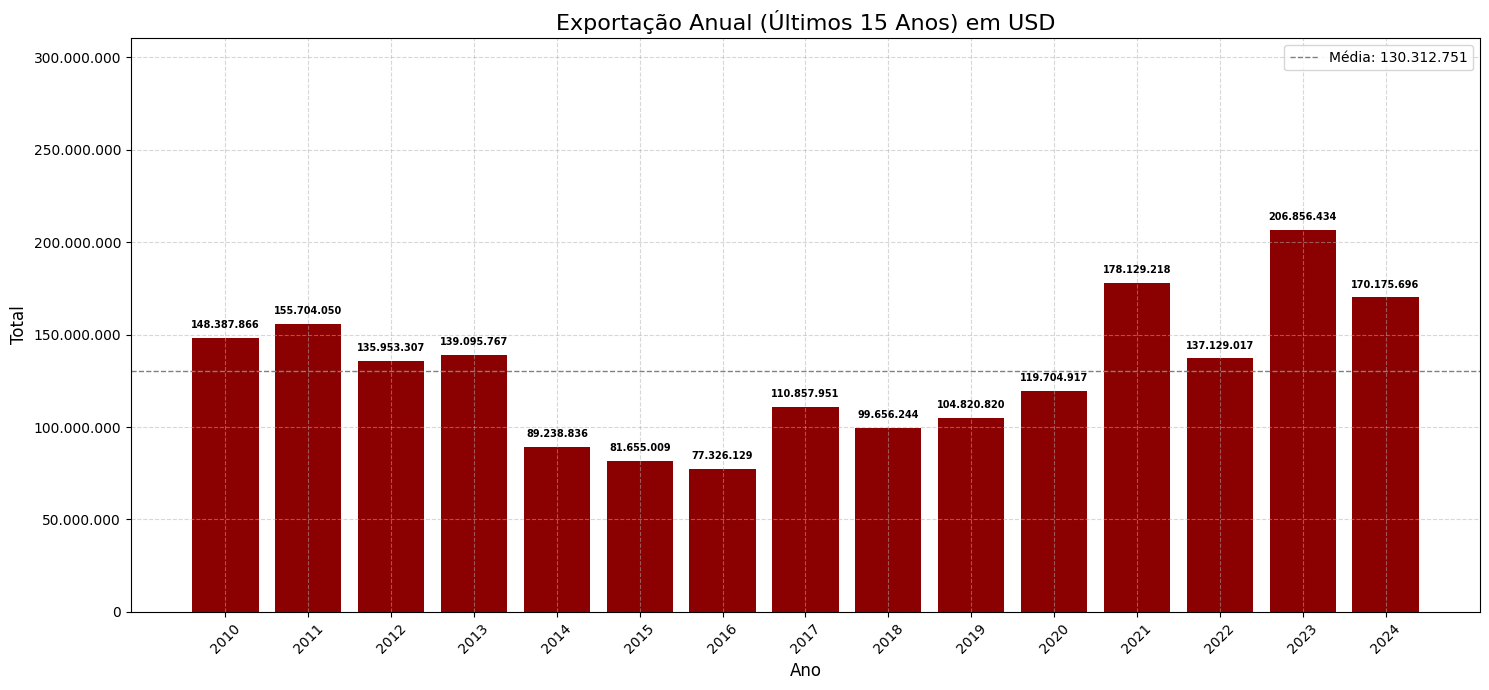

In [62]:
plot_ultimos_15_anos(df_valor_usd, column_name='Total Por Ano', title='Exportação Anual (Últimos 15 Anos) em USD', color='darkred')

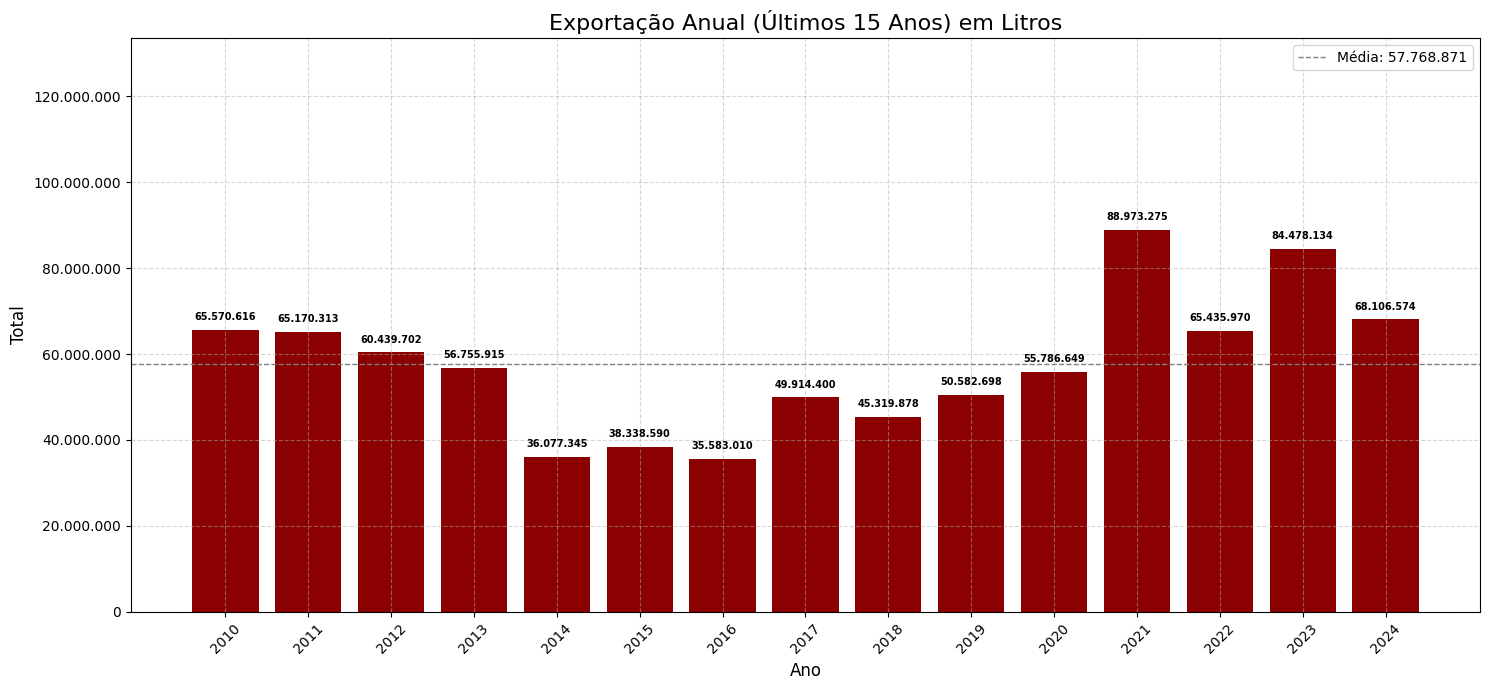

In [63]:
plot_ultimos_15_anos(df_volume, column_name='Total Por Ano', title='Exportação Anual (Últimos 15 Anos) em Litros', color='darkred')

# Analisando a exportação total de vinhos de mesa

In [64]:
exp_vinho_mesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Renomear colunas com sufixo '.1' para 'Valor USD'
for year in range(1970, 2025):
    col_usd = f"{year}.1"
    
    if col_usd in exp_vinho_mesa.columns:
        exp_vinho_mesa = exp_vinho_mesa.rename(columns={col_usd: f"{year} Valor USD"})


In [66]:
exp_vinho_mesa.head()

,Id,País,1970,1970 Valor USD,1971,1971 Valor USD,1972,1972 Valor USD,1973,1973 Valor USD,...,2020,2020 Valor USD,2021,2021 Valor USD,2022,2022 Valor USD,2023,2023 Valor USD,2024,2024 Valor USD
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Colunas de volume (sem "Valor USD" no nome)
colunas_volume = ['País'] + [col for col in exp_vinho_mesa.columns if col.isdigit()]

# Colunas de valor (com "Valor USD" no nome)
colunas_valor = ['País'] + [col for col in exp_vinho_mesa.columns if 'Valor USD' in col]

# Criação dos dois novos DataFrames
df_volume_exportado = exp_vinho_mesa[colunas_volume].copy()
df_valor_usd_exportado = exp_vinho_mesa[colunas_valor].copy()


In [68]:
df_volume_exportado.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,4,0,0,117,103
2,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,0,...,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
3,Angola,0,0,0,0,0,0,0,0,0,...,1908,7359,10170,477,345,0,0,4068,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_valor_usd_exportado.head()

,País,1970 Valor USD,1971 Valor USD,1972 Valor USD,1973 Valor USD,1974 Valor USD,1975 Valor USD,1976 Valor USD,1977 Valor USD,1978 Valor USD,...,2015 Valor USD,2016 Valor USD,2017 Valor USD,2018 Valor USD,2019 Valor USD,2020 Valor USD,2021 Valor USD,2022 Valor USD,2023 Valor USD,2024 Valor USD
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,95,21,0,0,698,1783
2,"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,...,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,0,0,0,0,0,0,0,0,0,...,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_volume_exportado = df_volume_exportado.T
df_valor_usd_exportado = df_valor_usd_exportado.T

In [71]:
df_volume_exportado.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,0,0,3200,0
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,0,0,1350,0
1973,0,0,12000,0,0,0,0,0,0,0,...,0,0,336,0,0,0,0,0,11700,0


In [72]:
df_valor_usd_exportado.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
1970 Valor USD,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971 Valor USD,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,0,0,2000,0
1972 Valor USD,0,0,2630,0,0,0,1936,0,0,0,...,0,0,0,0,0,0,0,0,750,0
1973 Valor USD,0,0,8250,0,0,0,0,0,0,0,...,0,0,300,0,0,0,0,0,6458,0


In [73]:
# Passo 1: Tornar a primeira linha o novo cabeçalho
df_volume_exportado.columns = df_volume_exportado.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_volume_exportado = df_volume_exportado.drop(df_volume_exportado.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_volume_exportado = df_volume_exportado.rename_axis('País').reset_index()


# Passo 1: Tornar a primeira linha o novo cabeçalho
df_valor_usd_exportado.columns = df_valor_usd_exportado.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_valor_usd_exportado = df_valor_usd_exportado.drop(df_valor_usd_exportado.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_valor_usd_exportado = df_valor_usd_exportado.rename_axis('País').reset_index()

In [74]:
# df_volume_exportado = df_volume_exportado.drop(exp_vinho_mesa.index[0])
# df_valor_usd_exportado = df_valor_usd_exportado.drop(exp_vinho_mesa.index[0])

In [75]:
# renomeia a coluna de produto para ano
df_volume_exportado = df_volume_exportado.rename(columns={"País": "ano"})
df_valor_usd_exportado = df_valor_usd_exportado.rename(columns={"País": "ano"})

In [76]:
# troca o tipo da coluna para inteiro
df_volume_exportado.head()

País,ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
0,1970,0,0,0,0,0,0,280,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1971,0,0,0,0,0,0,4800,0,0,...,0,0,0,0,0,0,0,0,3200,0
2,1972,0,0,4168,0,0,0,3000,0,0,...,0,0,0,0,0,0,0,0,1350,0
3,1973,0,0,12000,0,0,0,0,0,0,...,0,0,336,0,0,0,0,0,11700,0
4,1974,0,0,0,0,0,0,0,0,0,...,0,0,612,0,0,0,0,0,9830,0


In [77]:
df_valor_usd_exportado.head()

País,ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
0,1970 Valor USD,0,0,0,0,0,0,207,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1971 Valor USD,0,0,0,0,0,0,3705,0,0,...,0,0,0,0,0,0,0,0,2000,0
2,1972 Valor USD,0,0,2630,0,0,0,1936,0,0,...,0,0,0,0,0,0,0,0,750,0
3,1973 Valor USD,0,0,8250,0,0,0,0,0,0,...,0,0,300,0,0,0,0,0,6458,0
4,1974 Valor USD,0,0,0,0,0,0,0,0,0,...,0,0,563,0,0,0,0,0,5250,0


In [78]:
# troca o tipo da coluna para inteiro
df_volume_exportado['ano'] = df_volume_exportado['ano'].astype(int)

In [79]:
df_valor_usd_exportado.columns = [df_valor_usd_exportado.columns[0]] + [
    col.replace('Valor USD', '').strip() for col in df_valor_usd_exportado.columns[1:]
]

In [80]:
# Substitui o texto " Valor USD" por nada, e transforma em inteiro
df_valor_usd_exportado['ano'] = df_valor_usd_exportado['ano'].str.replace(' Valor USD', '').astype(int)

In [81]:
df_valor_usd_exportado.tail(15)

,ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
40,2010,0,0,138666,189891,0,0,12808,0,0,...,0,0,0,0,0,0,2929,0,0,9977
41,2011,0,0,144150,69001,0,0,10188,0,0,...,0,0,0,0,0,0,4404,0,0,0
42,2012,0,0,56342,8861,0,0,14081,0,0,...,0,0,2720,0,0,0,3879,0,7492,0
43,2013,0,0,265978,9300,0,0,19565,0,0,...,0,0,0,0,0,0,13343,0,0,0
44,2014,0,0,761653,23124,0,0,7169,0,0,...,0,0,1600,0,0,0,0,0,232,0
45,2015,0,0,44780,17089,0,0,10545,0,0,...,0,0,0,0,0,0,0,0,0,0
46,2016,0,0,68109,35390,0,0,26450,0,0,...,0,0,0,0,0,0,0,0,0,0
47,2017,0,0,87702,61680,0,0,8550,0,0,...,0,0,0,0,0,0,0,0,2646,0
48,2018,0,0,45382,709,0,191,0,0,0,...,0,0,0,0,150,0,29617,0,355,0
49,2019,0,95,25467,1065,0,1549,0,0,0,...,0,0,0,0,209,0,18497,0,0,32


In [82]:
# define a coluna ano como index
df_valor_usd_exportado = df_valor_usd_exportado.set_index("ano")
df_volume_exportado = df_volume_exportado.set_index("ano")

In [83]:
# Cria uma nova coluna de total
df_volume_exportado['Total Por Ano'] = df_volume_exportado.sum(axis=1)
df_valor_usd_exportado['Total Por Ano'] = df_valor_usd_exportado.sum(axis=1)

In [84]:
df_valor_usd_exportado.tail(16)

,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2009,0,0,393482,84235,0,0,10651,0,0,4523,...,0,0,0,0,0,0,0,0,2143,8940988
2010,0,0,138666,189891,0,0,12808,0,0,0,...,0,0,0,0,0,2929,0,0,9977,2595303
2011,0,0,144150,69001,0,0,10188,0,0,55460,...,0,0,0,0,0,4404,0,0,0,3615120
2012,0,0,56342,8861,0,0,14081,0,0,0,...,0,2720,0,0,0,3879,0,7492,0,5521293
2013,0,0,265978,9300,0,0,19565,0,0,0,...,0,0,0,0,0,13343,0,0,0,22744845
2014,0,0,761653,23124,0,0,7169,0,0,95130,...,0,1600,0,0,0,0,0,232,0,7472795
2015,0,0,44780,17089,0,0,10545,0,0,0,...,0,0,0,0,0,0,0,0,0,2769160
2016,0,0,68109,35390,0,0,26450,0,0,0,...,0,0,0,0,0,0,0,0,0,4434704
2017,0,0,87702,61680,0,0,8550,0,0,0,...,0,0,0,0,0,0,0,2646,0,7135607


In [85]:
df_volume_exportado.tail(16)

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2009,0,0,225086,54786,0,0,8235,0,0,162,...,0,0,0,0,0,0,0,0,743,25514198
2010,0,0,27715,33557,0,0,9810,0,0,0,...,0,0,0,0,0,914,0,0,8820,1280574
2011,0,0,36070,13889,0,0,7335,0,0,13253,...,0,0,0,0,0,1238,0,0,0,1214834
2012,0,0,8189,2833,0,0,9247,0,0,0,...,0,531,0,0,0,1135,0,1029,0,5775376
2013,0,0,61699,1573,0,0,11281,0,0,0,...,0,0,0,0,0,1526,0,0,0,9149059
2014,0,0,213348,12182,0,0,4455,0,0,20385,...,0,360,0,0,0,0,0,14,0,2324029
2015,0,0,10680,1908,0,0,6660,0,0,0,...,0,0,0,0,0,0,0,0,0,1198479
2016,0,0,14012,7359,0,0,16641,0,0,0,...,0,0,0,0,0,0,0,0,0,1786549
2017,0,0,15467,10170,0,0,5400,0,0,0,...,0,0,0,0,0,0,0,680,0,2889572


In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_ultimos_15_anos(df, column_name='Total Por Ano', title='Total de Produção por Ano (Últimos 15 Anos)', color='darkred', figsize=(15, 7)):
    """
    Plota o gráfico de barras dos últimos 15 anos de produção.

    Parâmetros:
    df (DataFrame): O DataFrame contendo os dados.
    column_name (str): O nome da coluna a ser usada para os valores de produção (default é 'Total Por Ano').
    title (str): O título do gráfico (default é 'Total de Produção por Ano (Últimos 15 Anos)').
    color (str): Cor das barras do gráfico (default é 'darkred').
    figsize (tuple): Tamanho da figura do gráfico (default é (15, 7)).
    """
    # Verificar se o 'column_name' existe nas colunas do DataFrame
    if column_name not in df.columns:
        raise ValueError(f"A coluna '{column_name}' não foi encontrada no DataFrame.")

    # Filtra os últimos 15 anos
    ultimos_15_anos = df.tail(16)

    # Plot do gráfico
    plt.figure(figsize=figsize)
    plt.bar(ultimos_15_anos.index, ultimos_15_anos[column_name], linestyle='-', color=color, linewidth=2)

    plt.title(title, fontsize=16, weight='light')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Total', fontsize=12)

    # Garantir que o eixo X mostre todos os anos
    plt.xticks(ultimos_15_anos.index, rotation=45, fontsize=10)

    # Formatador de milhar no eixo Y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Ajusta o limite do eixo Y para começar em 0 e terminar no valor máximo da coluna
    plt.ylim(0, ultimos_15_anos[column_name].max() * 1.5)  # Multiplica por 1.5 para dar um espaço maior acima do valor máximo

    # Adiciona uma linha para destacar a média geral
    media_total = ultimos_15_anos[column_name].mean()
    plt.axhline(media_total, color='gray', linestyle='--', linewidth=1, label=f'Média: {media_total:,.0f}'.replace(',', '.'))
    plt.legend()

    # Adiciona os valores em cima de cada barra
    for i, valor in enumerate(ultimos_15_anos[column_name]):
        plt.text(ultimos_15_anos.index[i], valor + (ultimos_15_anos[column_name].max() * 0.02),  # Pequeno deslocamento
             f'{int(valor):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=7, fontweight='bold')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


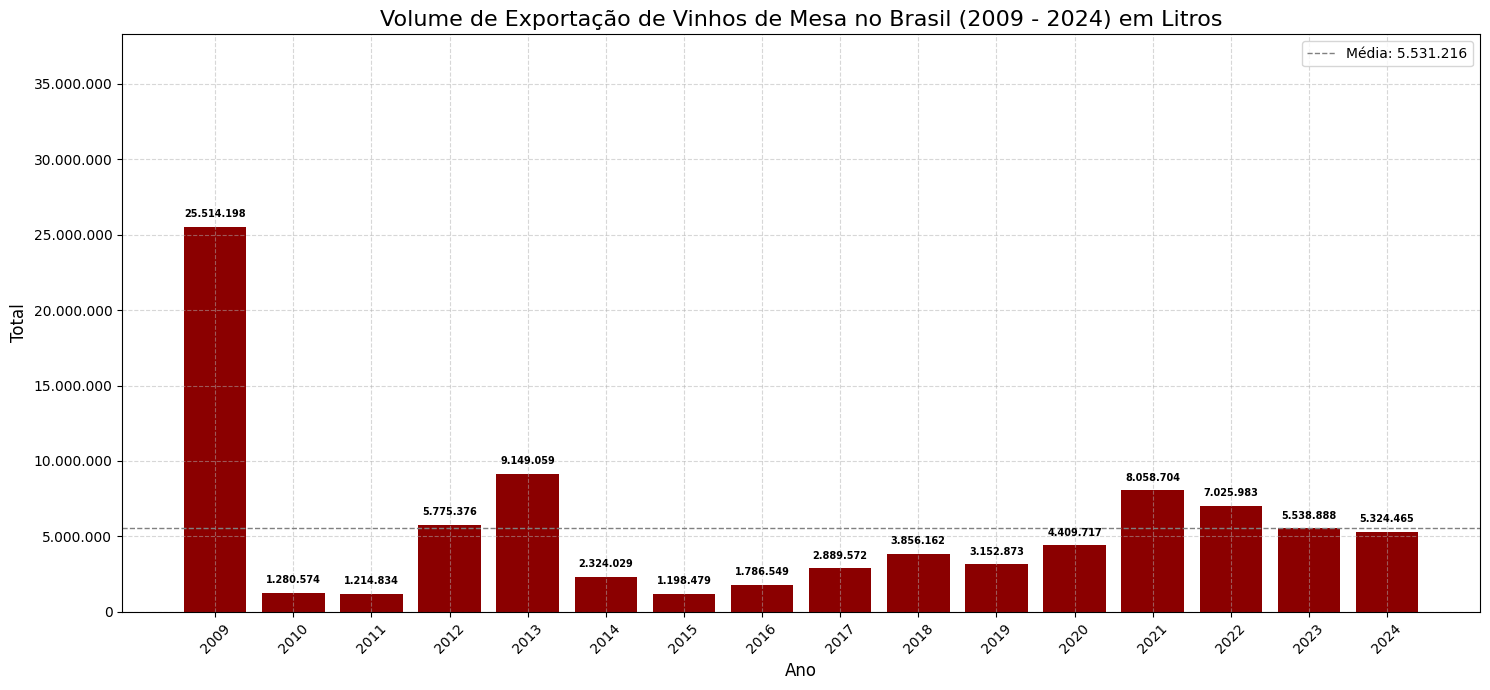

In [87]:
plot_ultimos_15_anos(df_volume_exportado, column_name='Total Por Ano', title='Volume de Exportação de Vinhos de Mesa no Brasil (2009 - 2024) em Litros', color='darkred')

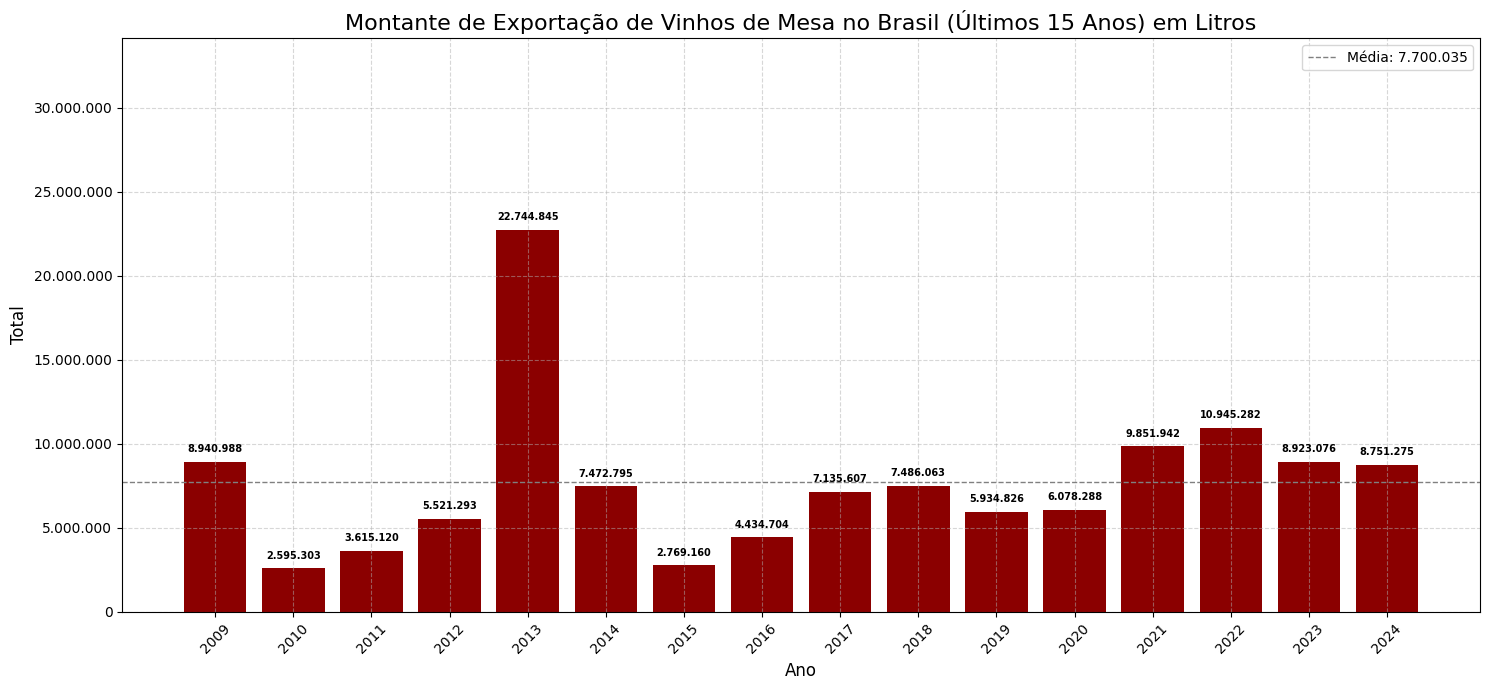

In [88]:
plot_ultimos_15_anos(df_valor_usd_exportado, column_name='Total Por Ano', title='Montante de Exportação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em Litros', color='darkred')

In [89]:
# Cria uma nova linha de total
# Cria uma nova linha com o total de cada coluna
nova_linha = df_volume_exportado.sum(axis=0)

# Adiciona a linha ao final do DataFrame
df_volume_exportado.loc['Total Geral'] = nova_linha


In [90]:
df_volume_exportado

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,0,136009
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,0,3200,0,281305
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,0,1350,0,381020
1973,0,0,12000,0,0,0,0,0,0,0,...,0,336,0,0,0,0,0,11700,0,471270
1974,0,0,0,0,0,0,0,0,0,0,...,0,612,0,0,0,0,0,9830,0,356985
1975,0,0,0,0,0,0,1800,0,0,0,...,0,0,0,0,0,0,0,4050,0,688183
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,753885
1977,0,0,0,0,0,0,0,0,0,0,...,0,2520,0,0,0,1384,0,0,0,999085
1978,0,0,0,0,0,0,0,0,0,0,...,0,3844,0,0,0,13396,0,0,0,547585


In [91]:
df_volume_exportado.tail()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2021,11,0,2698,0,0,805,0,0,0,6,...,0,0,0,343,0,136774,0,26415,0,8058704
2022,0,0,7630,4068,0,419,0,0,0,480,...,0,0,0,418,0,637117,0,23220,130,7025983
2023,0,117,4806,0,0,383,0,124,0,4545,...,3,0,0,28104,0,326093,0,141030,72,5538888
2024,0,103,6666,0,0,447,0,32,6,21015,...,0,64,0,216,0,36729,0,122922,16,5324465
Total Geral,11,713,1217473,5819857,454,2934,176046,156,6,1102597,...,3,41362,1406,29556,2,1530371,18,370297,11900,259401509


In [92]:
df_volume_exportado_paises = df_volume_exportado.iloc[:, :-1]

In [93]:
df_volume_exportado_paises = df_volume_exportado_paises.T.sort_values(by="Total Geral", axis=0, ascending=False).T.tail(17)

In [94]:
df_volume_exportado_paises.iloc[:-1, :6]

País,Paraguai,Estados Unidos,Rússia,Japão,Angola,Reino Unido
ano,,,,,,
2009,486927,372319,21912914,217974,54786,30092
2010,510989,228968,0,112178,33557,123624
2011,240168,306787,0,100835,13889,122629
2012,354824,146585,4528176,29281,2833,82937
2013,481564,245368,5893291,91988,1573,59161
2014,521847,222267,190656,106426,12182,305807
2015,495428,195896,47664,31597,1908,68382
2016,985739,258072,0,34341,7359,117044
2017,2393468,132688,0,33909,10170,60711


País  Paraguai  Estados Unidos    Rússia   Japão  Angola
ano                                                     
2009    486927          372319  21912914  217974   54786
2010    510989          228968         0  112178   33557
2011    240168          306787         0  100835   13889
2012    354824          146585   4528176   29281    2833
2013    481564          245368   5893291   91988    1573
Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024],
      dtype='object', name='ano')
[[  486927   372319 21912914   217974    54786]
 [  510989   228968        0   112178    33557]
 [  240168   306787        0   100835    13889]
 [  354824   146585  4528176    29281     2833]
 [  481564   245368  5893291    91988     1573]
 [  521847   222267   190656   106426    12182]
 [  495428   195896    47664    31597     1908]
 [  985739   258072        0    34341     7359]
 [ 2393468   132688        0    33909    10170]
 [ 3234168   169109     

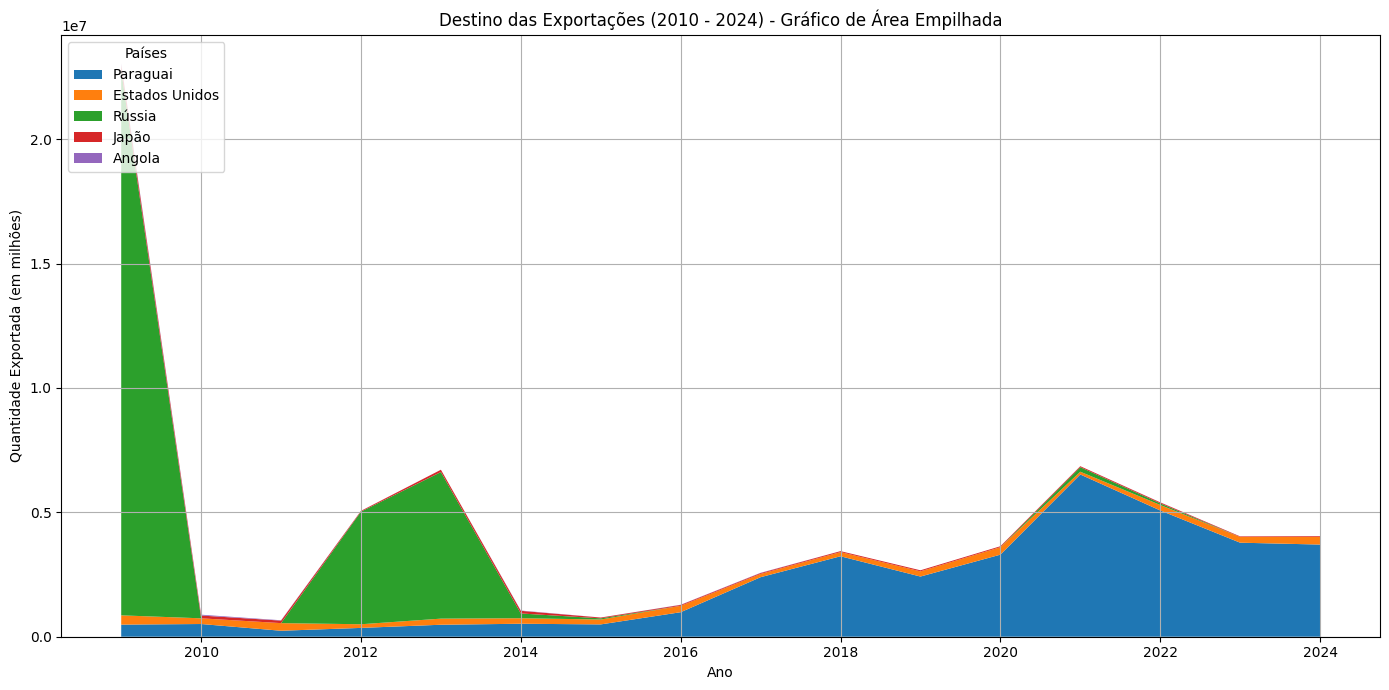

In [95]:
import matplotlib.pyplot as plt

# Selecionando as primeiras 5 colunas e desconsiderando a última linha
df_selected = df_volume_exportado_paises.iloc[:-1, :5]

# Verificar e garantir que as colunas sejam numéricas
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')  # Coerce transforma valores não numéricos em NaN

# Remover ou substituir NaN por 0
df_selected = df_selected.fillna(0)

# Confirmar se o DataFrame está correto
print(df_selected.head())

# Verificando os valores e o índice
print(df_selected.index)
print(df_selected.values)

# Gráfico de área empilhada
plt.figure(figsize=(14, 7))

# Convertendo a indexação para um formato de lista para o eixo X
plt.stackplot(list(df_selected.index), df_selected.T.values, labels=df_selected.columns)

plt.title('Destino das Exportações (2010 - 2024) - Gráfico de Área Empilhada')
plt.ylabel('Quantidade Exportada (em milhões)')
plt.xlabel('Ano')
plt.legend(title='Países', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
df_volume_exportado_brasil = df_volume_exportado['Brasil']
df_valor_usd_exportado_brasil = df_valor_usd_exportado['Brasil']

In [97]:
df_volume_exportado_brasil = pd.DataFrame(df_volume_exportado_brasil)
df_valor_usd_exportado_brasil = pd.DataFrame(df_valor_usd_exportado_brasil)

In [98]:
df_valor_usd_exportado_brasil.tail()

,Brasil
ano,
2020,0
2021,46
2022,952
2023,0
2024,244


In [99]:
df_volume_exportado_brasil.tail()

,Brasil
ano,
2021,31
2022,2504
2023,0
2024,96
Total Geral,2631


In [100]:
df_volume_exportado.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,0,136009
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,0,3200,0,281305
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,0,1350,0,381020
1973,0,0,12000,0,0,0,0,0,0,0,...,0,336,0,0,0,0,0,11700,0,471270
1974,0,0,0,0,0,0,0,0,0,0,...,0,612,0,0,0,0,0,9830,0,356985


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

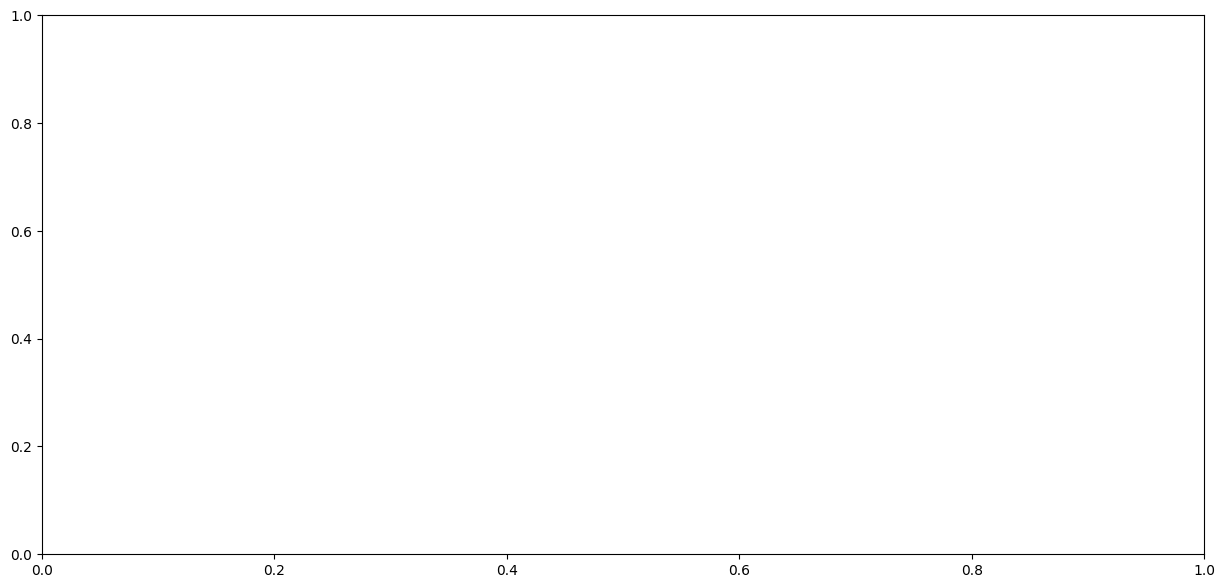

In [101]:
plot_ultimos_15_anos(df_volume_exportado, column_name='Total Por Ano', title='Volume de Exportação de Vinhos de Mesa Anual (2009 - 2024) em Litros', color='darkred')

In [ ]:
# Cria uma nova coluna de total
df_volume_exportado_brasil['Total Por Ano'] = df_volume_exportado_brasil.sum(axis=1)
df_valor_usd_exportado_brasil['Total Por Ano'] = df_valor_usd_exportado_brasil.sum(axis=1)

In [ ]:
df_volume_exportado.tail()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2021,11,0,2698,0,0,805,0,0,0,6,...,0,0,0,343,0,136774,0,26415,0,8058704
2022,0,0,7630,4068,0,419,0,0,0,480,...,0,0,0,418,0,637117,0,23220,130,7025983
2023,0,117,4806,0,0,383,0,124,0,4545,...,3,0,0,28104,0,326093,0,141030,72,5538888
2024,0,103,6666,0,0,447,0,32,6,21015,...,0,64,0,216,0,36729,0,122922,16,5324465
Total Geral,11,713,1217473,5819857,454,2934,176046,156,6,1102597,...,3,41362,1406,29556,2,1530371,18,370297,11900,268303912


In [ ]:
df_volume_exportado.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,...,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,0,136009
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,0,3200,0,281305
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,0,1350,0,381020
1973,0,0,12000,0,0,0,0,0,0,0,...,0,336,0,0,0,0,0,11700,0,471270
1974,0,0,0,0,0,0,0,0,0,0,...,0,612,0,0,0,0,0,9830,0,356985


In [ ]:
df_volume_exportado = df_volume_exportado.iloc[:-1, :]

In [ ]:
plot_ultimos_15_anos(df_volume_exportado, column_name='Total Por Ano', title='Volume de Exportação de Vinhos de Mesa Anual (2009 - 2024) em Litros', color='darkred')

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

Error in callback <function _draw_all_if_interactive at 0x000001E74DEE4E50> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 1500x700 with 1 Axes>

In [ ]:
df_valor_usd_exportado_brasil.head()

,Brasil
ano,
1970,0
1971,0
1972,0
1973,0
1974,0


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

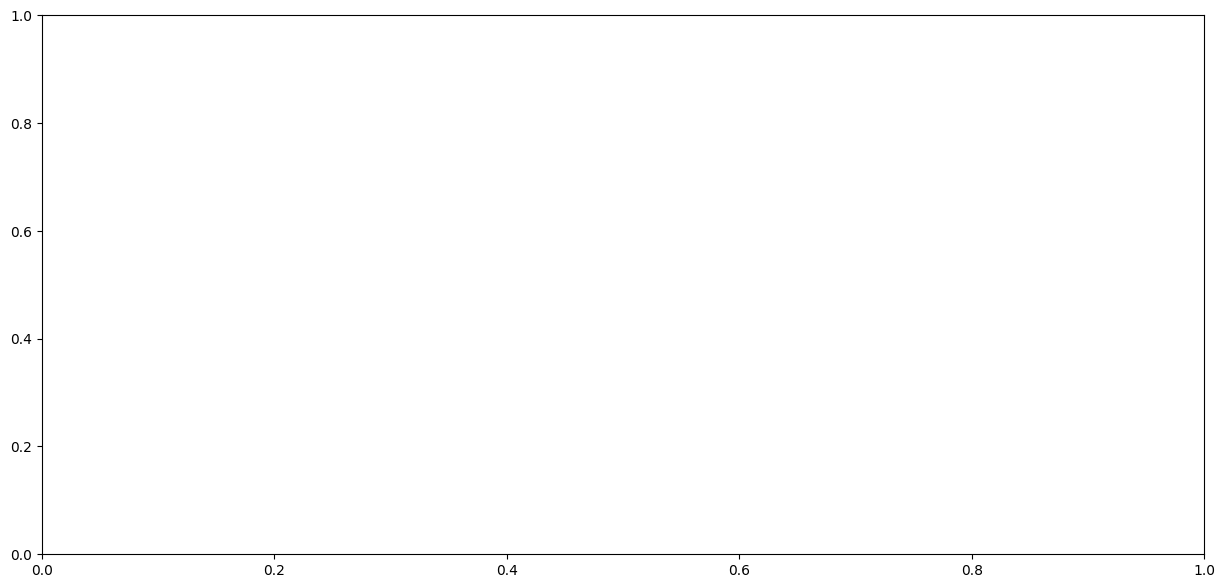

In [ ]:
plot_ultimos_15_anos(df_volume_exportado, column_name='Total Por Ano', title='Exportação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em USD', color='darkred')

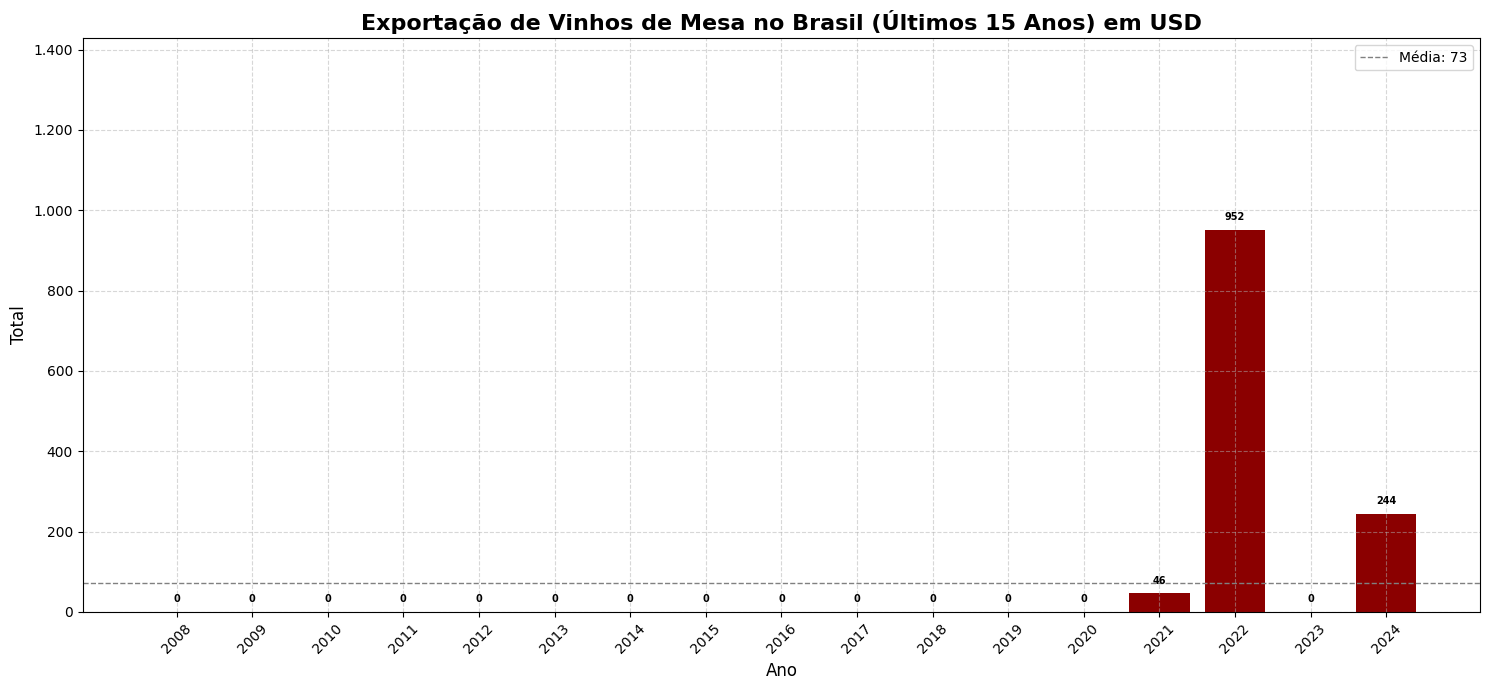

In [ ]:
plot_ultimos_15_anos(df_valor_usd_exportado_brasil, column_name='Total Por Ano', title='Exportação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em USD', color='darkred')

In [ ]:
plot_ultimos_15_anos(df_volume_exportado, column_name='Total Por Ano', title='Volume de Exportação de Vinhos de Mesa Anual (2009 - 2024) em Litros', color='darkred')

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

Error in callback <function _draw_all_if_interactive at 0x000001E74DEE4E50> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 1500x700 with 1 Axes>

In [ ]:
# plot_ultimos_15_anos(df_valor_usd_exportado, column_name='Total Por Ano', title='Exportação de Vinhos de Mesa Anual (Últimos 15 Anos) em USD', color='darkred')

# Analisando a importação total de vinhos de mesa

In [ ]:
imp_vinho_mesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,627150,1701072,859169,2508140,738116,2266827,522733,1732850,658238,2133775
1,2,Alemanha,52297,30498,34606,26027,134438,92103,111523,98638,...,136992,504168,106541,546967,92600,438595,102456,557947,121002,805466
2,3,Argélia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0,0,0,0,0,0,0,...,0,0,2510,8761,0,0,8,161,0,0
4,5,Argentina,19525,12260,24942,15022,104906,58137,116887,76121,...,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138,26272478,93869579


In [ ]:
# Renomear colunas com sufixo '.1' para 'Valor USD'
for year in range(1970, 2025):
    col_usd = f"{year}.1"
    
    if col_usd in imp_vinho_mesa.columns:
        imp_vinho_mesa = imp_vinho_mesa.rename(columns={col_usd: f"{year} Valor USD"})

In [ ]:
imp_vinho_mesa = imp_vinho_mesa.replace(0, pd.NA)

In [ ]:
imp_vinho_mesa.head()

,Id,País,1970,1970 Valor USD,1971,1971 Valor USD,1972,1972 Valor USD,1973,1973 Valor USD,...,2020,2020 Valor USD,2021,2021 Valor USD,2022,2022 Valor USD,2023,2023 Valor USD,2024,2024 Valor USD
0,1,Africa do Sul,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,627150,1701072,859169,2508140,738116,2266827,522733,1732850,658238,2133775
1,2,Alemanha,52297,30498,34606,26027,134438,92103,111523,98638,...,136992,504168,106541,546967,92600,438595,102456,557947,121002,805466
2,3,Argélia,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,Arábia Saudita,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,2510,8761,<NA>,<NA>,8,161,<NA>,<NA>
4,5,Argentina,19525,12260,24942,15022,104906,58137,116887,76121,...,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138,26272478,93869579


In [ ]:
# Colunas de volume (sem "Valor USD" no nome)
colunas_volume = ['País'] + [col for col in imp_vinho_mesa.columns if col.isdigit()]

# Colunas de valor (com "Valor USD" no nome)
colunas_valor = ['País'] + [col for col in imp_vinho_mesa.columns if 'Valor USD' in col]

# Criação dos dois novos DataFrames
df_volume_importado = imp_vinho_mesa[colunas_volume].copy()
df_valor_usd_importado = imp_vinho_mesa[colunas_valor].copy()


In [ ]:
df_volume_importado = df_volume_importado.T
df_valor_usd_importado = df_valor_usd_importado.T

In [ ]:
df_valor_usd_importado.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
País,Africa do Sul,Alemanha,Argélia,Arábia Saudita,Argentina,Armênia,Austrália,Áustria,Bermudas,Bélgica,...,Suazilândia,Suíça,"Tcheca, República",Tunísia,Turquia,Ucrânia,Uruguai,Não consta na tabela,Não declarados,Outros
1970 Valor USD,<NA>,30498,<NA>,<NA>,12260,<NA>,<NA>,707,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1871,<NA>,<NA>,4255
1971 Valor USD,<NA>,26027,<NA>,<NA>,15022,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,636,<NA>,<NA>,42028
1972 Valor USD,<NA>,92103,<NA>,<NA>,58137,<NA>,<NA>,520,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2741,<NA>,<NA>,25032
1973 Valor USD,<NA>,98638,<NA>,<NA>,76121,<NA>,<NA>,2081,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5775


In [ ]:
# Passo 1: Tornar a primeira linha o novo cabeçalho
df_valor_usd_importado.columns = df_valor_usd_importado.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_valor_usd_importado = df_valor_usd_importado.drop(df_valor_usd_importado.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_valor_usd_importado = df_valor_usd_importado.rename_axis('País').reset_index()

# Passo 1: Tornar a primeira linha o novo cabeçalho
df_volume_importado.columns = df_volume_importado.iloc[0]

# Passo 2: Remover essa linha do DataFrame
df_volume_importado = df_volume_importado.drop(df_volume_importado.index[0])

# Passo 3: Renomear a coluna do índice (que era o index) como 'Ano'
df_volume_importado = df_volume_importado.rename_axis('País').reset_index()

In [ ]:
df_valor_usd_importado.head()

País,País,Africa do Sul,Alemanha,Argélia,Arábia Saudita,Argentina,Armênia,Austrália,Áustria,Bermudas,...,Suazilândia,Suíça,"Tcheca, República",Tunísia,Turquia,Ucrânia,Uruguai,Não consta na tabela,Não declarados,Outros
0,1970 Valor USD,<NA>,30498,<NA>,<NA>,12260,<NA>,<NA>,707,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1871,<NA>,<NA>,4255
1,1971 Valor USD,<NA>,26027,<NA>,<NA>,15022,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,636,<NA>,<NA>,42028
2,1972 Valor USD,<NA>,92103,<NA>,<NA>,58137,<NA>,<NA>,520,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2741,<NA>,<NA>,25032
3,1973 Valor USD,<NA>,98638,<NA>,<NA>,76121,<NA>,<NA>,2081,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5775
4,1974 Valor USD,<NA>,202502,<NA>,<NA>,167473,<NA>,<NA>,7394,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28163


In [ ]:
# renomeia a coluna de produto para ano
df_volume_importado = df_volume_importado.rename(columns={"País": "ano"})
df_valor_usd_importado = df_valor_usd_importado.rename(columns={"País": "ano"})

In [ ]:
df_valor_usd_importado.head()

País,ano,Africa do Sul,Alemanha,Argélia,Arábia Saudita,Argentina,Armênia,Austrália,Áustria,Bermudas,...,Suazilândia,Suíça,"Tcheca, República",Tunísia,Turquia,Ucrânia,Uruguai,Não consta na tabela,Não declarados,Outros
0,1970 Valor USD,<NA>,30498,<NA>,<NA>,12260,<NA>,<NA>,707,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1871,<NA>,<NA>,4255
1,1971 Valor USD,<NA>,26027,<NA>,<NA>,15022,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,636,<NA>,<NA>,42028
2,1972 Valor USD,<NA>,92103,<NA>,<NA>,58137,<NA>,<NA>,520,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2741,<NA>,<NA>,25032
3,1973 Valor USD,<NA>,98638,<NA>,<NA>,76121,<NA>,<NA>,2081,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5775
4,1974 Valor USD,<NA>,202502,<NA>,<NA>,167473,<NA>,<NA>,7394,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28163


In [ ]:
# troca o tipo da coluna para inteiro
df_volume_importado['ano'] = df_volume_importado['ano'].astype(int)

In [ ]:
df_valor_usd_importado.columns = [df_valor_usd_importado.columns[0]] + [
    col.replace('Valor USD', '').strip() for col in df_valor_usd_importado.columns[1:]
]

In [ ]:
# Substitui o texto " Valor USD" por nada, e transforma em inteiro
df_valor_usd_importado['ano'] = df_valor_usd_importado['ano'].str.replace(' Valor USD', '').astype(int)

In [ ]:
# define a coluna ano como index
df_valor_usd_importado = df_valor_usd_importado.set_index("ano")
df_volume_importado = df_volume_importado.set_index("ano")

In [ ]:
df_valor_usd_importado.head()

,Africa do Sul,Alemanha,Argélia,Arábia Saudita,Argentina,Armênia,Austrália,Áustria,Bermudas,Bélgica,...,Suazilândia,Suíça,"Tcheca, República",Tunísia,Turquia,Ucrânia,Uruguai,Não consta na tabela,Não declarados,Outros
ano,,,,,,,,,,,,,,,,,,,,,
1970,<NA>,30498,<NA>,<NA>,12260,<NA>,<NA>,707,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1871,<NA>,<NA>,4255
1971,<NA>,26027,<NA>,<NA>,15022,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,636,<NA>,<NA>,42028
1972,<NA>,92103,<NA>,<NA>,58137,<NA>,<NA>,520,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2741,<NA>,<NA>,25032
1973,<NA>,98638,<NA>,<NA>,76121,<NA>,<NA>,2081,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5775
1974,<NA>,202502,<NA>,<NA>,167473,<NA>,<NA>,7394,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28163


In [ ]:
# Cria uma nova coluna de total
df_volume_importado['Total Por Ano'] = df_volume_importado.sum(axis=1)
df_valor_usd_importado['Total Por Ano'] = df_valor_usd_importado.sum(axis=1)

In [ ]:
# Cria uma nova linha de total
# Cria uma nova linha com o total de cada coluna
#nova_linha = df_volume_importado.sum(axis=0)

# Adiciona a linha ao final do DataFrame
#df_volume_importado.loc['Total Geral'] = nova_linha


In [ ]:
df_volume_importado_paises = df_volume_importado.iloc[:, :-1]

In [ ]:
#df_volume_importado_paises = df_volume_importado_paises.T.sort_values(by="Total Geral", axis=0, ascending=False).T.tail(15)


In [ ]:
df_volume_importado_paises.iloc[:-1, :5]

País,Africa do Sul,Alemanha,Argélia,Arábia Saudita,Argentina
ano,,,,,
1970,<NA>,52297,<NA>,<NA>,19525
1971,<NA>,34606,<NA>,<NA>,24942
1972,<NA>,134438,<NA>,<NA>,104906
1973,<NA>,111523,<NA>,<NA>,116887
1974,<NA>,219173,<NA>,<NA>,215930
1975,<NA>,134354,<NA>,<NA>,145823
1976,<NA>,168134,<NA>,<NA>,348653
1977,<NA>,160926,<NA>,<NA>,408399
1978,<NA>,437831,<NA>,<NA>,614134


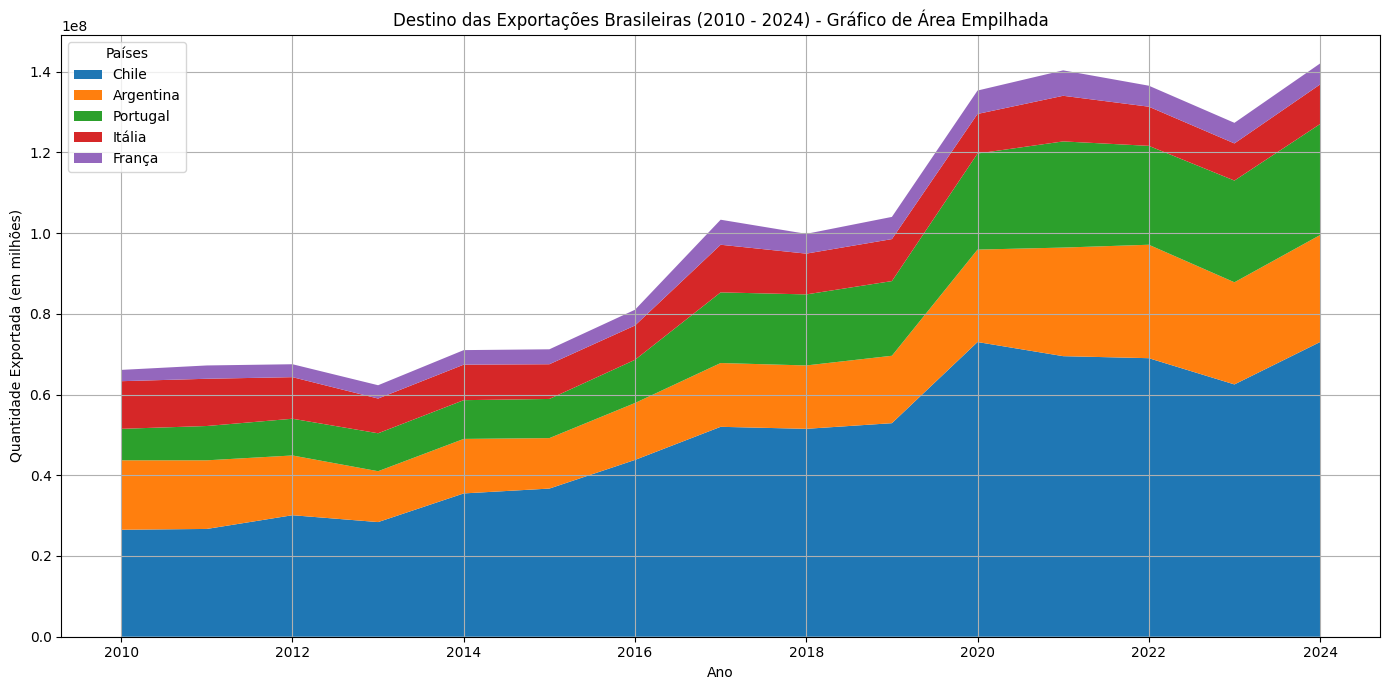

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dados simulados com base na imagem original
anos = list(range(2010, 2025))
dados = {
    'Chile': [26500000, 26700000, 30100000, 28400000, 35500000, 36700000, 43800000, 52000000, 51500000, 52900000, 73000000, 69500000, 69000000, 62500000, 73000000],
    'Argentina': [17200000, 17000000, 14800000, 12600000, 13500000, 12500000, 14100000, 15800000, 15700000, 16700000, 22900000, 26900000, 28100000, 25300000, 26500000],
    'Portugal': [7800000, 8500000, 9100000, 9400000, 9600000, 9700000, 10700000, 17500000, 17600000, 18500000, 23800000, 26300000, 24500000, 25200000, 27500000],
    'Itália': [11800000, 11700000, 10300000, 8600000, 8800000, 8600000, 8500000, 11800000, 10100000, 10400000, 9800000, 11300000, 9700000, 9200000, 9800000],
    'França': [2800000, 3300000, 3200000, 3300000, 3600000, 3700000, 3900000, 6200000, 4900000, 5500000, 5800000, 6300000, 5200000, 5100000, 5200000]
}
df = pd.DataFrame(dados, index=anos)

# Gráfico de área empilhada
plt.figure(figsize=(14, 7))
plt.stackplot(df.index, df.T.values, labels=df.columns)
plt.title('Destino das Exportações Brasileiras (2010 - 2024) - Gráfico de Área Empilhada')
plt.ylabel('Quantidade Exportada (em milhões)')
plt.xlabel('Ano')
plt.legend(title='Países', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_volume_importado_brasil = df_volume_importado['Brasil']
df_valor_usd_importado_brasil = df_valor_usd_importado['Brasil']

In [ ]:
df_volume_importado_brasil = pd.DataFrame(df_volume_importado_brasil)
df_valor_usd_importado_brasil = pd.DataFrame(df_valor_usd_importado_brasil)

In [ ]:
# Cria uma nova coluna de total
df_volume_importado_brasil['Total Por Ano'] = df_volume_importado_brasil.sum(axis=1)
df_valor_usd_importado_brasil['Total Por Ano'] = df_valor_usd_importado_brasil.sum(axis=1)

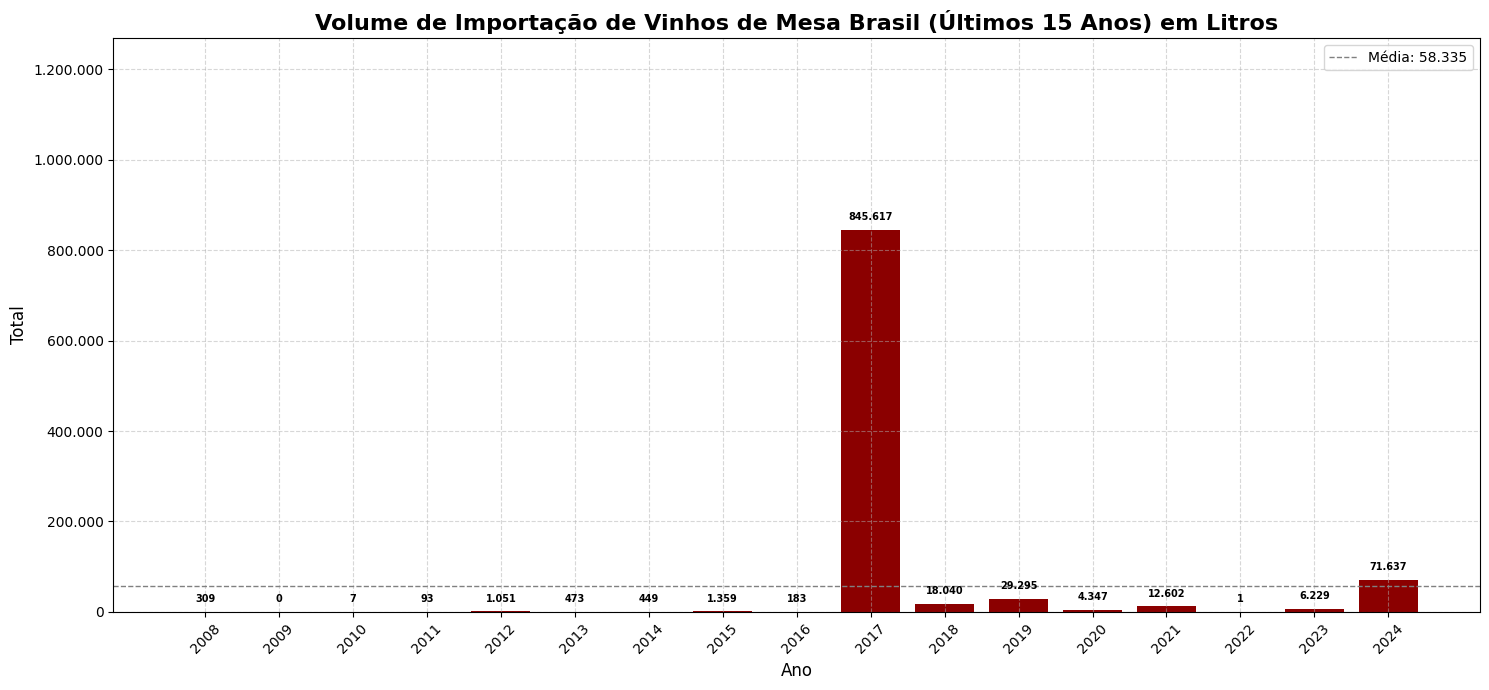

In [ ]:
plot_ultimos_15_anos(df_volume_importado_brasil, column_name='Total Por Ano', title='Volume de Importação de Vinhos de Mesa Brasil (Últimos 15 Anos) em Litros', color='darkred')

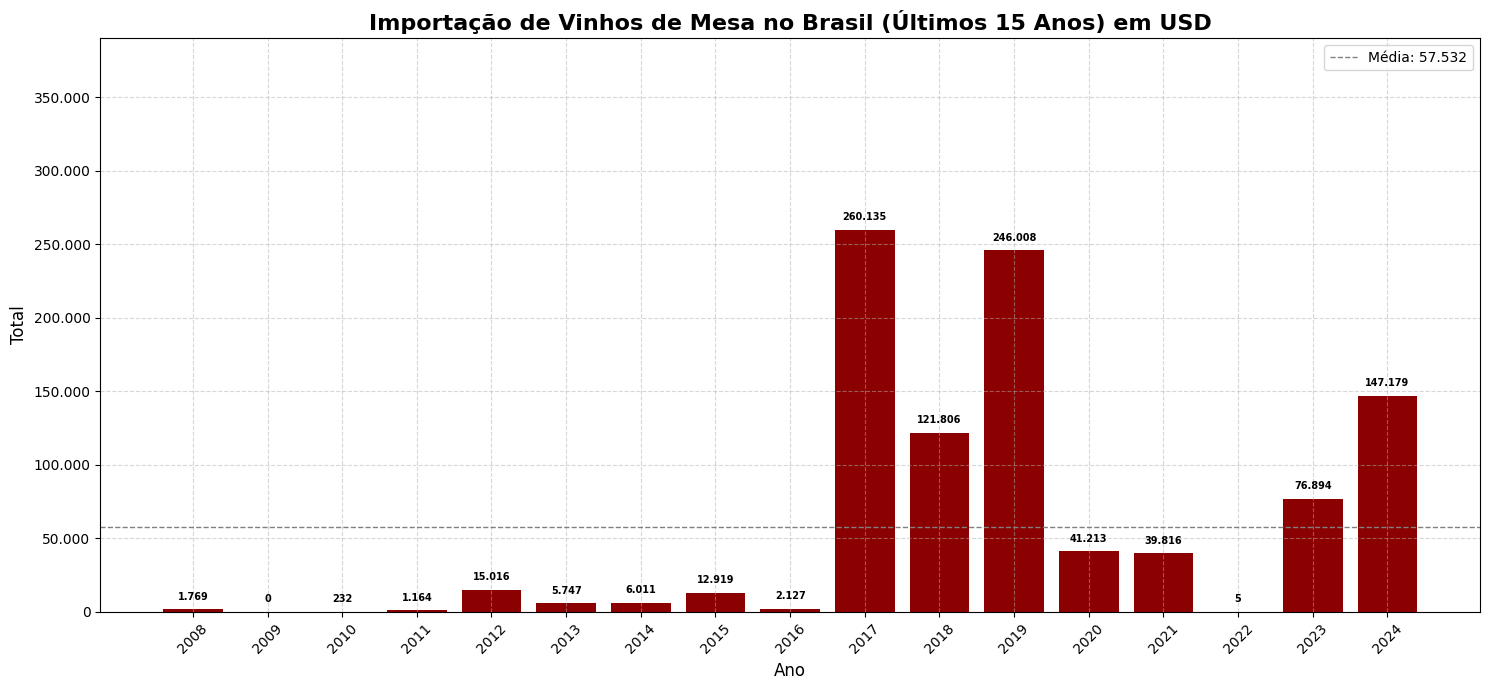

In [ ]:
plot_ultimos_15_anos(df_valor_usd_importado_brasil, column_name='Total Por Ano', title='Importação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em USD', color='darkred')

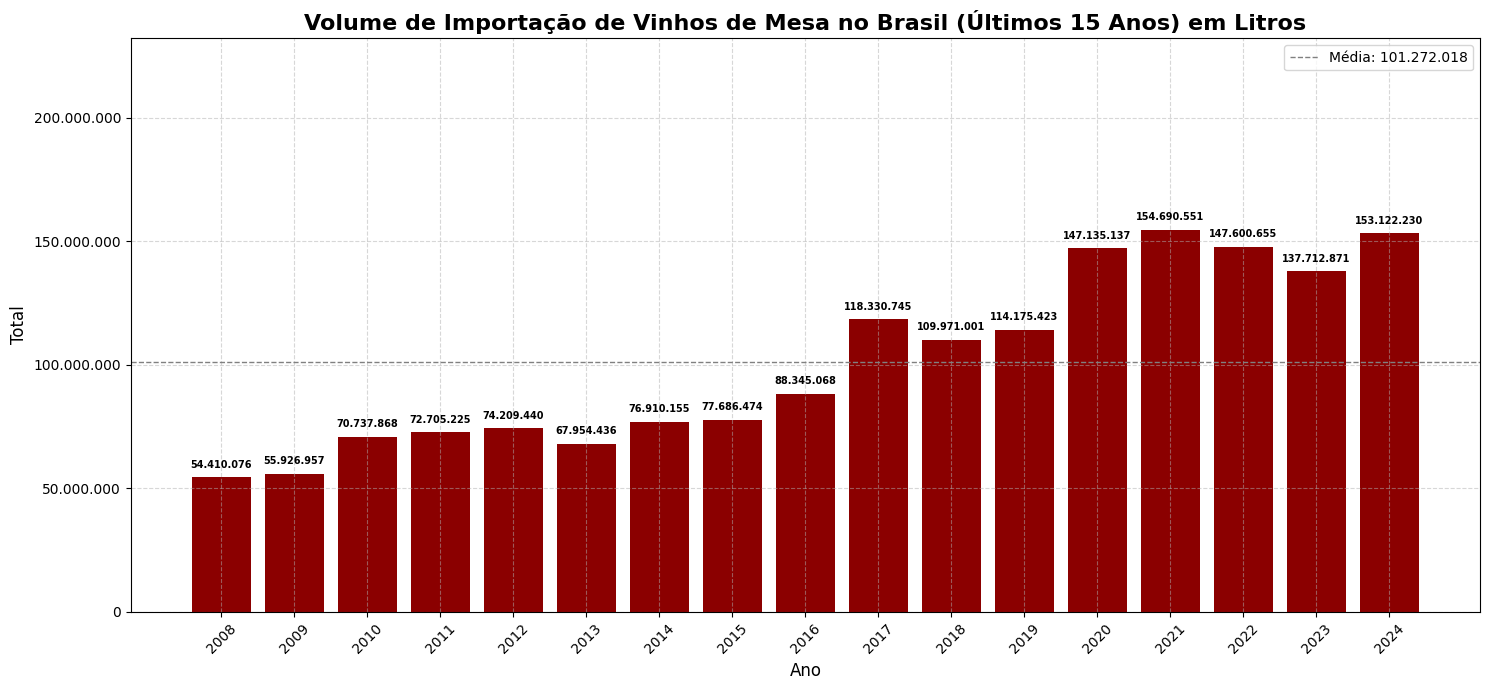

In [ ]:
plot_ultimos_15_anos(df_volume_importado, column_name='Total Por Ano', title='Volume de Importação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em Litros', color='darkred')

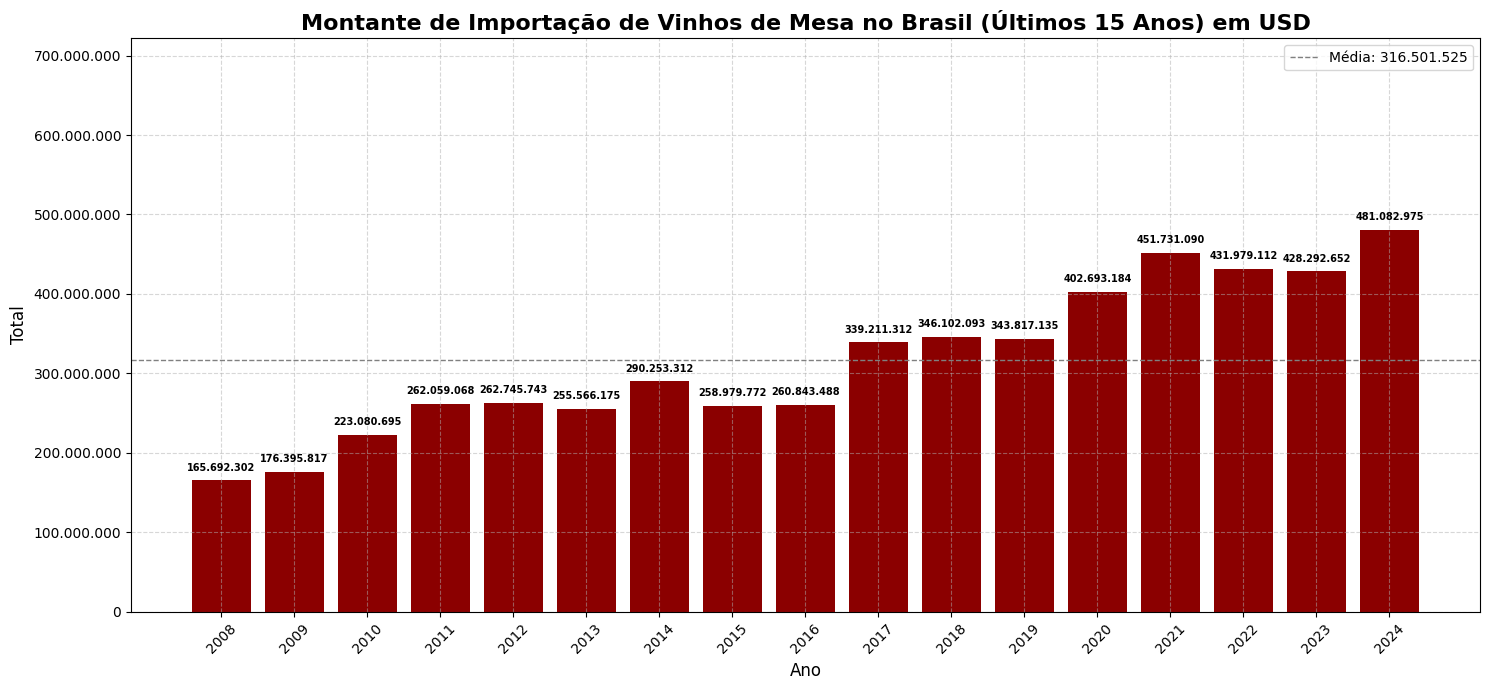

In [ ]:
plot_ultimos_15_anos(df_valor_usd_importado, column_name='Total Por Ano', title='Montante de Importação de Vinhos de Mesa no Brasil (Últimos 15 Anos) em USD', color='darkred')

# Analisando a comercialização

In [ ]:
comercializacao

,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,ou_Vinho_base,Vinho base para espumantes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,59,ou_Vinho_composto,Vinho composto,3386173,3645774,3921573,4168841,3670736,3493104,5429800,...,450121,413735,377685,485944,249165,366549,63625,227116,32000,981
59,60,ou_Vinho_licoroso,Vinho licoroso,3013056,2475632,2407816,2443944,1921867,2205036,2474364,...,616904,510975,546189,496746,491165,465964,362340,376597,385006,421974
60,61,ou_Vinho_leve,Vinho leve,0,0,0,0,0,0,0,...,0,0,0,0,198,306,396,0,27,132064


In [ ]:
#remove a coluna control
comercializacao = comercializacao.drop("control", axis=1)

In [ ]:
comercializacao.T.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
id,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
Produto,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,VINHO ORGÂNICO,...,Sangria,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado
1970,98327606,83300735,107681,14919190,4430629,435354,183234,3812041,466480,0,...,0,0,0,1359297,0,0,3386173,3013056,0,0
1971,114399031,98522869,542274,15333888,4840369,428927,227299,4184143,358116,0,...,0,0,0,1256068,0,0,3645774,2475632,0,0
1972,118377367,101167932,7770851,9438584,5602091,624499,403664,4573928,356340,0,...,0,0,0,1524908,0,0,3921573,2407816,0,0


In [ ]:
# renomeia a coluna de produto para ano
comercializacao = comercializacao.rename(columns={"Produto": "ano"})

In [ ]:
# invert df
comercializacao = comercializacao.T

In [ ]:
comercializacao.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
id,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
ano,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,VINHO ORGÂNICO,...,Sangria,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado
1970,98327606,83300735,107681,14919190,4430629,435354,183234,3812041,466480,0,...,0,0,0,1359297,0,0,3386173,3013056,0,0
1971,114399031,98522869,542274,15333888,4840369,428927,227299,4184143,358116,0,...,0,0,0,1256068,0,0,3645774,2475632,0,0
1972,118377367,101167932,7770851,9438584,5602091,624499,403664,4573928,356340,0,...,0,0,0,1524908,0,0,3921573,2407816,0,0


In [ ]:
# Transforma o índice em coluna
comercializacao = comercializacao.reset_index()
# Usa a linha com 'ano' como cabeçalho
comercializacao.columns = comercializacao.iloc[1]  # A linha 'ano' está no índice 1 após reset
# Remove as duas primeiras linhas (antigo index 'id' e 'ano')
comercializacao = comercializacao[2:].reset_index(drop=True)


In [ ]:
comercializacao.head()

1,ano,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,...,Sangria,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado
0,1970,98327606,83300735,107681,14919190,4430629,435354,183234,3812041,466480,...,0,0,0,1359297,0,0,3386173,3013056,0,0
1,1971,114399031,98522869,542274,15333888,4840369,428927,227299,4184143,358116,...,0,0,0,1256068,0,0,3645774,2475632,0,0
2,1972,118377367,101167932,7770851,9438584,5602091,624499,403664,4573928,356340,...,0,0,0,1524908,0,0,3921573,2407816,0,0
3,1973,116617910,98196747,8425617,9995546,7202830,783508,1377333,5041989,327865,...,0,0,0,1426737,0,0,4168841,2443944,0,0
4,1974,94173324,77167303,8891367,8114654,7571802,1616144,1725564,4230094,270641,...,0,0,0,1717666,0,0,3670736,1921867,0,0


In [ ]:
# troca o tipo da coluna para inteiro
comercializacao['ano'] = comercializacao['ano'].astype(int)

In [ ]:
# define a coluna ano como index
comercializacao = comercializacao.set_index("ano")

In [ ]:
# Cria uma nova coluna de total
comercializacao['Total Por Ano'] = comercializacao.sum(axis=1)

In [ ]:
# Cria uma nova linha de total
# Cria uma nova linha com o total de cada coluna
nova_linha = comercializacao.sum(axis=0)

# Adiciona a linha ao final do DataFrame
comercializacao.loc['Total Geral'] = nova_linha


In [ ]:
comercializacao.tail()

1,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,VINHO ORGÂNICO,...,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2020,215557931,189573423,1394901,24589607,24310834,18202453,993248,5115133,2557585,10718,...,248771,1075579,6049584,1879227,0,63625,362340,396,4012,892823595
2021,210012238,185653678,1931606,22426954,27080445,19337862,1603537,6139046,3696762,18686,...,332217,795060,5647166,1448086,0,227116,376597,0,53495,915939652
2022,187939996,165067340,2213723,20658933,21533487,15258778,1318396,4956314,2875864,14947,...,296664,987142,5309881,1052563,0,32000,385006,27,14947,892181335
2023,187016848,165097539,2520748,19398561,18589310,12450606,1214583,4924121,2843600,9123,...,338926,1769130,5047280,194020,0,981,421974,132064,410215,903876940
Total Geral,9722978897,7928599738,503568215,1286002328,1430272879,613473050,80746909,736052921,36809700,56028,...,2462443,19158559,170689495,77589148,60173,77390646,67053578,132991,482948,29759638129


In [ ]:
comercializacao.columns

Index(['VINHO DE MESA', '  Tinto', '  Rosado', '  Branco',
       'VINHO  FINO DE MESA', '  Tinto', '  Rosado', '  Branco',
       'VINHO FRIZANTE', 'VINHO ORGÂNICO', 'VINHO ESPECIAL', '  Tinto',
       '  Rosado', '  Branco', 'ESPUMANTES ', '  Espumante  Moscatel',
       '  Espumante', '  Espumante Orgânico', 'SUCO DE UVAS',
       '  Suco Natural Integral', '  Suco Adoçado',
       '  Suco Reprocessado/reconstituido', '  Suco Orgânico',
       '  Outros sucos de uvas', 'SUCO DE UVAS CONCENTRADO',
       'OUTROS PRODUTOS COMERCIALIZADOS',
       '  Outros vinhos (sem informação detalhada)',
       '  Agrin (fermentado, acetico misto)', '  Aguardente de vinho 50°gl',
       '  Alcool vinico', '  Bagaceira (graspa)',
       '  Base champenoise champanha', '  Base charmat champanha',
       '  Base espumante moscatel', '  Bebida de uva', '  Borra líquida',
       '  Borra seca', '  Brandy (conhaque)', '  Cooler',
       '  Coquetel com vinho', '  Destilado de vinho', '  Filtrado doce',


In [ ]:
comercializacao = trim_df(comercializacao)

In [ ]:
comercializacao.columns

Index(['VINHO DE MESA', 'Tinto', 'Rosado', 'Branco', 'VINHO  FINO DE MESA',
       'Tinto', 'Rosado', 'Branco', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 'Tinto', 'Rosado', 'Branco', 'ESPUMANTES',
       'Espumante  Moscatel', 'Espumante', 'Espumante Orgânico',
       'SUCO DE UVAS', 'Suco Natural Integral', 'Suco Adoçado',
       'Suco Reprocessado/reconstituido', 'Suco Orgânico',
       'Outros sucos de uvas', 'SUCO DE UVAS CONCENTRADO',
       'OUTROS PRODUTOS COMERCIALIZADOS',
       'Outros vinhos (sem informação detalhada)',
       'Agrin (fermentado, acetico misto)', 'Aguardente de vinho 50°gl',
       'Alcool vinico', 'Bagaceira (graspa)', 'Base champenoise champanha',
       'Base charmat champanha', 'Base espumante moscatel', 'Bebida de uva',
       'Borra líquida', 'Borra seca', 'Brandy (conhaque)', 'Cooler',
       'Coquetel com vinho', 'Destilado de vinho', 'Filtrado doce', 'Jeropiga',
       'Mistelas', 'Mosto concentrado', 'Mosto de uva', 'Mosto sulfit

In [ ]:
comercializacao.tail()

1,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,VINHO ORGÂNICO,...,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado,Total Por Ano
ano,,,,,,,,,,,,,,,,,,,,,
2020,215557931,189573423,1394901,24589607,24310834,18202453,993248,5115133,2557585,10718,...,248771,1075579,6049584,1879227,0,63625,362340,396,4012,892823595
2021,210012238,185653678,1931606,22426954,27080445,19337862,1603537,6139046,3696762,18686,...,332217,795060,5647166,1448086,0,227116,376597,0,53495,915939652
2022,187939996,165067340,2213723,20658933,21533487,15258778,1318396,4956314,2875864,14947,...,296664,987142,5309881,1052563,0,32000,385006,27,14947,892181335
2023,187016848,165097539,2520748,19398561,18589310,12450606,1214583,4924121,2843600,9123,...,338926,1769130,5047280,194020,0,981,421974,132064,410215,903876940
Total Geral,9722978897,7928599738,503568215,1286002328,1430272879,613473050,80746909,736052921,36809700,56028,...,2462443,19158559,170689495,77589148,60173,77390646,67053578,132991,482948,29759638129


In [ ]:
comercializacao_produtos = comercializacao.iloc[:, :-1]

In [ ]:
comercializacao_produtos.T.sort_values(by="Total Geral", axis=0, ascending=False).T.tail()

1,VINHO DE MESA,Tinto,SUCO DE UVAS,VINHO FINO DE MESA,OUTROS PRODUTOS COMERCIALIZADOS,Branco,SUCO DE UVAS CONCENTRADO,Branco,Tinto,Suco Natural Integral,...,Base champenoise champanha,Vinho gaseificado,Borra líquida,Vinho leve,Suco Adoçado,Alcool vinico,Vinho base para espumantes,VINHO ORGÂNICO,Espumante Orgânico,Aguardente de vinho 50°gl
ano,,,,,,,,,,,,,,,,,,,,,
2020,215557931,189573423,144889668,24310834,26547242,24589607,22422414,5115133,18202453,114453657,...,8772,4012,22975,396,0,6640,0,10718,742,866
2021,210012238,185653678,147753321,27080445,26657930,22426954,26730942,6139046,19337862,115173833,...,9580,53495,935,0,0,0,0,18686,639,0
2022,187939996,165067340,157125036,21533487,31704382,20658933,33632834,4956314,15258778,115394795,...,60958,14947,49840,27,0,0,0,14947,597,0
2023,187016848,165097539,166708720,18589310,29889342,19398561,37852507,4924121,12450606,129419407,...,66290,410215,72600,132064,128599,0,0,9123,558,111
Total Geral,9722978897,7928599738,1826086400,1430272879,1403336770,1286002328,834065703,736052921,613473050,606070377,...,709848,482948,359611,132991,128599,84192,60173,56028,2847,982


In [ ]:
comercializacao_produtos.head()

1,VINHO DE MESA,Tinto,Rosado,Branco,VINHO FINO DE MESA,Tinto,Rosado,Branco,VINHO FRIZANTE,VINHO ORGÂNICO,...,Sangria,Vinagre balsamico,Vinagre duplo,Vinagre simples,Vinho acetificado,Vinho base para espumantes,Vinho composto,Vinho licoroso,Vinho leve,Vinho gaseificado
ano,,,,,,,,,,,,,,,,,,,,,
1970,98327606,83300735,107681,14919190,4430629,435354,183234,3812041,466480,0,...,0,0,0,1359297,0,0,3386173,3013056,0,0
1971,114399031,98522869,542274,15333888,4840369,428927,227299,4184143,358116,0,...,0,0,0,1256068,0,0,3645774,2475632,0,0
1972,118377367,101167932,7770851,9438584,5602091,624499,403664,4573928,356340,0,...,0,0,0,1524908,0,0,3921573,2407816,0,0
1973,116617910,98196747,8425617,9995546,7202830,783508,1377333,5041989,327865,0,...,0,0,0,1426737,0,0,4168841,2443944,0,0
1974,94173324,77167303,8891367,8114654,7571802,1616144,1725564,4230094,270641,0,...,0,0,0,1717666,0,0,3670736,1921867,0,0


In [ ]:
comercializacao_produtos_mais_vendidos = comercializacao_produtos.loc[:, comercializacao_produtos.loc["Total Geral"].sort_values(ascending=False).head(10).index]

In [ ]:
comercializacao_produtos_mais_vendidos.iloc[:, :-13]

1,VINHO DE MESA,Tinto,Tinto,Tinto,SUCO DE UVAS
ano,,,,,
1970,98327606,83300735,435354,4730346,2626855
1971,114399031,98522869,428927,4802828,2745249
1972,118377367,101167932,624499,4347706,4069351
1973,116617910,98196747,783508,5017487,5668991
1974,94173324,77167303,1616144,3763509,4673891
1975,108031792,91528090,2050960,4815235,5802187
1976,139238614,116407222,4450570,4819463,6433821
1977,140813114,116609545,4504303,3959050,6814893
1978,141293379,117203914,4920802,4083073,6963440


In [ ]:
comercializacao_produtos_mais_vendidos.head()

1,VINHO DE MESA,Tinto,Tinto,Tinto,SUCO DE UVAS,VINHO FINO DE MESA,OUTROS PRODUTOS COMERCIALIZADOS,Branco,Branco,Branco,SUCO DE UVAS CONCENTRADO,Branco,Branco,Branco,Tinto,Tinto,Tinto,Suco Natural Integral
ano,,,,,,,,,,,,,,,,,,
1970,98327606,83300735,435354,4730346,2626855,4430629,19844550,14919190,3812041,1365879,0,14919190,3812041,1365879,83300735,435354,4730346,0
1971,114399031,98522869,428927,4802828,2745249,4840369,20351384,15333888,4184143,1359282,0,15333888,4184143,1359282,98522869,428927,4802828,0
1972,118377367,101167932,624499,4347706,4069351,5602091,23615205,9438584,4573928,2488098,59044,9438584,4573928,2488098,101167932,624499,4347706,0
1973,116617910,98196747,783508,5017487,5668991,7202830,25401454,9995546,5041989,2614455,1951966,9995546,5041989,2614455,98196747,783508,5017487,0
1974,94173324,77167303,1616144,3763509,4673891,7571802,24530878,8114654,4230094,1885634,1619428,8114654,4230094,1885634,77167303,1616144,3763509,0
